## Curating the data

### Sort the maxima found from each core

In [1]:
### IMPORTS ###
import sys
sys.path.append('../')

import pickle
from operator import itemgetter

## Extract the optimisation result ##
num_cores = 32
maxfev = 5000 # 4000


pkl_fname = f'./Data/FOM_3rd_bounds2_optimisation_maxfev{maxfev*num_cores}.pkl'
txt_fname = f'./Data/FOM_3rd_bounds2_optimisation_maxfev{maxfev*num_cores}_curated.txt'
# pkl_fname = f'./Data/FOM_3rd_optimisation_maxfev{maxfev*num_cores}.pkl'
# txt_fname = f'./Data/FOM_3rd_optimisation_maxfev{maxfev*num_cores}_curated.txt'
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)


## Sort the maxima and maximisers based on value ##
opt_FOMs = data["FOM"]
opt_gratings = data["Optimised grating"]
opt_params = data["Optimised parameters"] #[0]
# # opt_params = [grating.params for grating in opt_gratings]

maxima_and_maximisers = zip(opt_FOMs, opt_params)
maxima_and_gratings = zip(opt_FOMs, opt_gratings)

# Sort all local maxima from largest to smallest
maxima_and_maximisers_sorted = sorted(maxima_and_maximisers, key=itemgetter(0), reverse=True)
opt_gratings_sorted = sorted(maxima_and_gratings, key=itemgetter(0), reverse=True)

### Write the sorted maxima to file

In [3]:
# Results to file
lines_to_file = ["\n------------------------------------------------------------------------------------------------------------------------------------\n"
                , f"All maxima | (local maximum, local maximiser)\n"]

with open(txt_fname, "a") as result_file:
    result_file.writelines(lines_to_file)
    
    for idx, maxima_and_maximiser in enumerate(maxima_and_maximisers_sorted):
        result_file.write(f"Max no. {idx} | {maxima_and_maximiser}\n")

    result_file.write("------------------------------------------------------------------------------------------------------------------------------------\n")

### Plot the optimal grating spectrum

grating_pitch (og): 1.4834163307844226
grating_pitch:    1.4834163307844226
grating_depth:    0.5574033441615399
box1_width:       0.10124307290938891
box2_width:       0.07668108191921183
box_centre_dist:  0.26691566871762373
box1_eps:         9.614468035026526
box2_eps:         9.382524064430278
gaussian_width:   33.91625693667024
substrate depth:  0.17018992326955273
substrate eps:    9.422786403090557


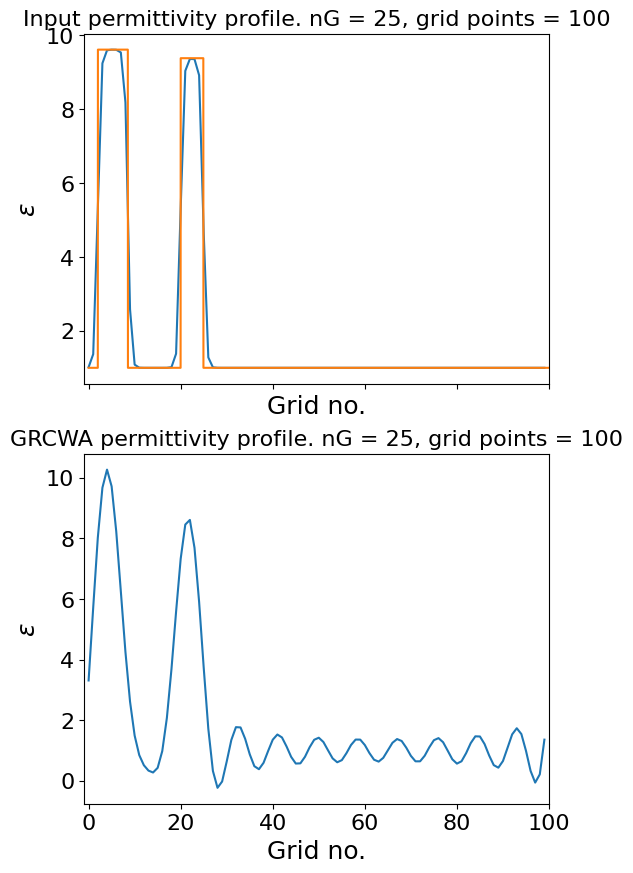

Optimised FoM:  -5.696127205454202e-13
Grating parameters: [ 1.48341633  0.55740334  0.10124307  0.07668108  0.26691567  9.61446804
  9.38252406 33.91625694  0.17018992  9.4227864 ]


(<Figure size 684.055x577.428 with 1 Axes>,
 <Axes: title={'center': "$h_1' = 0.557\\lambda_0$, $\\Lambda' = 1.553\\lambda_0$"}, xlabel="$\\lambda'/\\Lambda'$", ylabel='FoM'>)

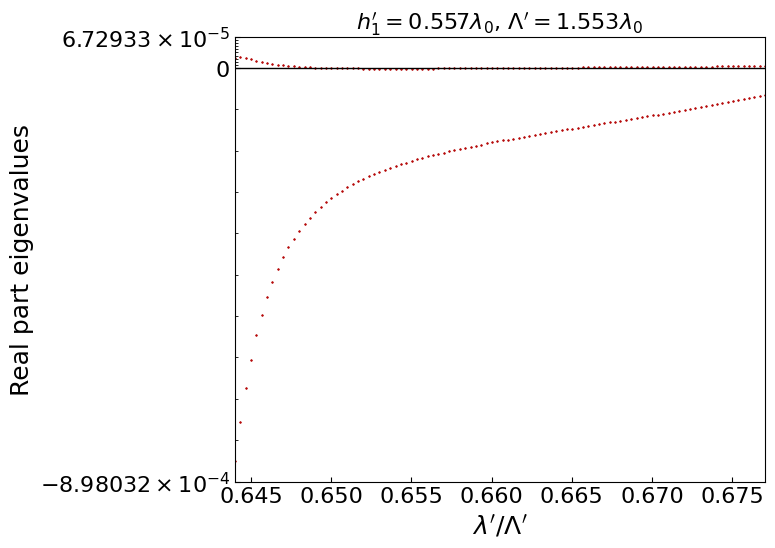

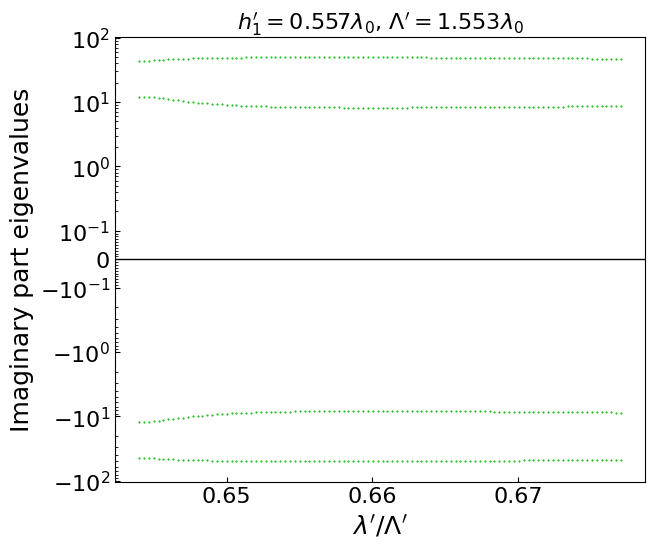

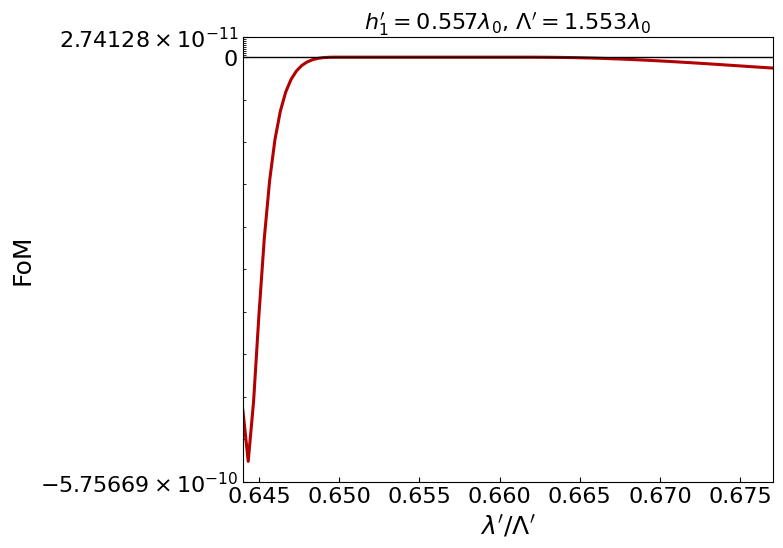

In [2]:
from copy import deepcopy
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 

from opt_updated import FOM_uniform
from parameters import D1_ND

optimum_number = 0 # maxfev=1000: optimum 8, #(4), (8) for 3rd FoM
grating = deepcopy(opt_gratings_sorted[optimum_number][1])

# 1st FoM problem
grating.params=maxima_and_maximisers_sorted[optimum_number][1]

# Test optimum convergence
grating.Qabs = np.inf
grating.nG = 25
grating.Nx = 100

# 5000: #(0): 1/0.644

print("grating_pitch (og):", grating.params[0])
grating.grating_pitch   = 1/0.644 #grating.params[0] # (4): 1/0.785, (8): 1/0.815
grating.grating_depth   = grating.params[1]
grating.box1_width      = grating.params[2]
grating.box2_width      = grating.params[3]
grating.box_centre_dist = grating.params[4]
grating.box1_eps        = grating.params[5]
grating.box2_eps        = grating.params[6]

grating.gaussian_width  = grating.params[7]
grating.substrate_depth = grating.params[8]
grating.substrate_eps   = grating.params[9]

# Grating parameters
print("grating_pitch:   ",grating.params[0])
print("grating_depth:   ",grating.params[1])
print("box1_width:      ",grating.params[2])
print("box2_width:      ",grating.params[3])
print("box_centre_dist: ",grating.params[4])
print("box1_eps:        ",grating.params[5])
print("box2_eps:        ",grating.params[6])
print("gaussian_width:  ",grating.params[7])
print("substrate depth: ",grating.params[8])
print("substrate eps:   ",grating.params[9])

_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)

print("Optimised FoM: ", maxima_and_maximisers_sorted[optimum_number][0])
# grating_FOM = FOM_uniform(grating, final_speed=5., goal=0.1, return_grad=False)
print(f"Grating parameters: {grating.params}")
# print(f"Grating FOM: {grating_FOM}")

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([5/100,0])]
# wavelength_range =  [grating.grating_pitch*0.79,grating.grating_pitch* 0.798]
n_plot = 100

grating.show_spectrum(angle, "eig", wavelength_range, n_plot)
grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)

# # Save and display
# p_fname = f"Data/permittivity_optnum{optimum_number}"
# p_fig.savefig(p_fname+".pdf", bbox_inches='tight')
# p_fig.savefig(p_fname+".png", bbox_inches='tight')

# fname = f"Data/{quantity}_spectrum_optnum{optimum_number}_range{100*wavelength_range[0]:2.0f}-{100*wavelength_range[1]:2.0f}_pts{n_plot}"
# fig.savefig(fname+".pdf", bbox_inches='tight')
# fig.savefig(fname+".png", bbox_inches='tight')x

## Testing optimums

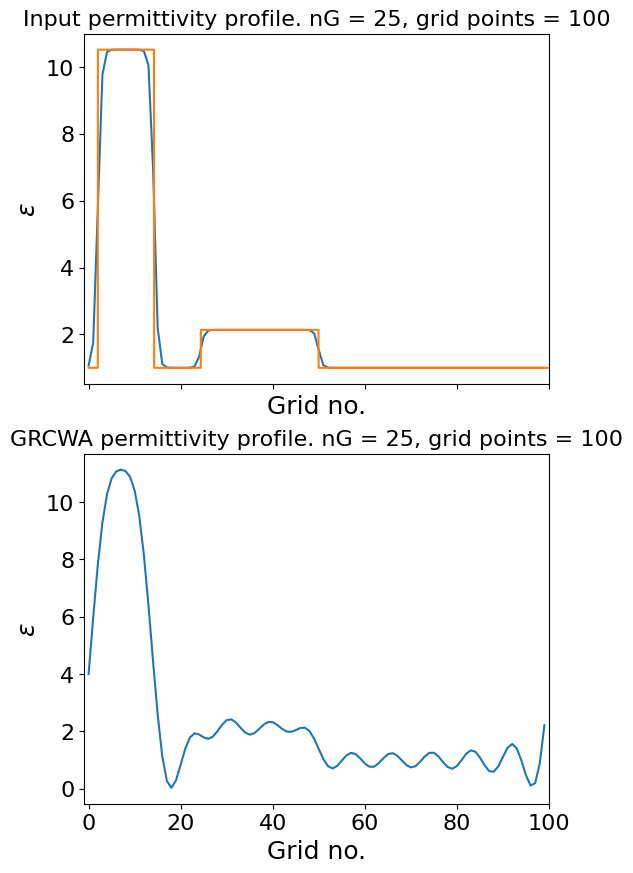

(<Figure size 684.055x577.428 with 1 Axes>,
 <Axes: title={'center': "$h_1' = 1.071\\lambda_0$, $\\Lambda' = 1.227\\lambda_0$"}, xlabel="$\\lambda'/\\Lambda'$", ylabel='FoM'>)

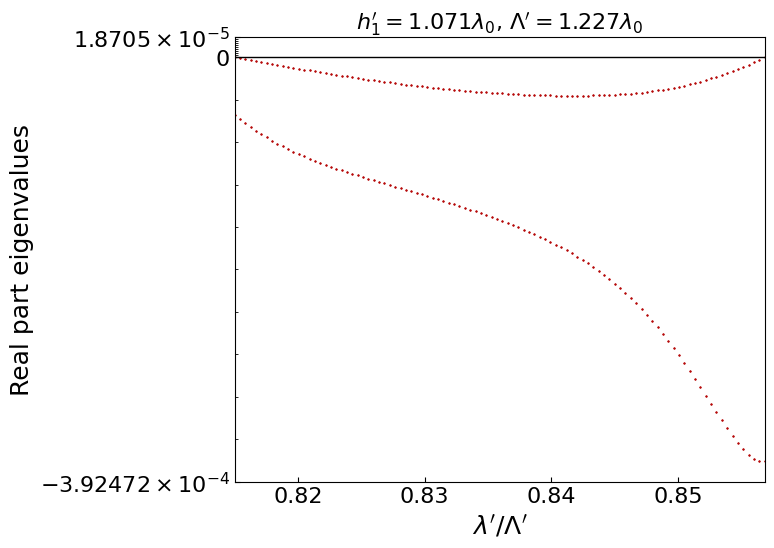

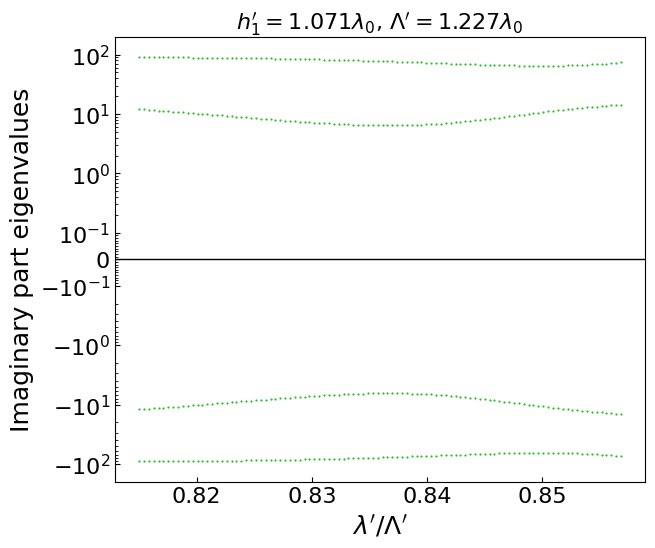

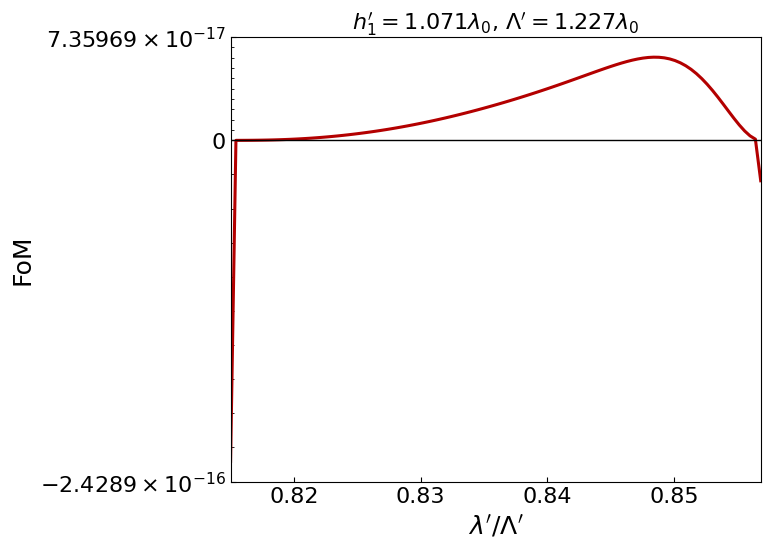

In [6]:
import numpy as np
from parameters import D1_ND

# grating_pitch       = 1.2269978029745547
# grating_depth       = 1.0726436615674193
# box1_width          = 0.1515059132717179
# box2_width          = 0.31395785954765837
# box_centre_dist     = 0.35636277319399284
# box1_eps            = 10.520511410156894
# box2_eps            = 2.135936627506108
# gaussian_width      = 27.588940562650258
# substrate_depth     = 0.5370461396356464
# substrate_eps       = 9.27168631788567

# grating_pitch       = 1.2269841131887969 
# grating_depth       = 1.0713117239642316 
# box1_width          = 0.15025691519718043 
# box2_width          = 0.3138635230200561 
# box_centre_dist     = 0.35636005808776605 
# box1_eps            = 10.519680275825518 
# box2_eps            = 2.1349489752088338 
# gaussian_width      = 27.588940231206365 
# substrate_depth     = 0.538013161833306
# substrate_eps       = 9.270700352110826

grating_pitch       = 1.2269811605707412 
grating_depth       = 1.0708522823419322 
box1_width          = 0.14980809579234236
box2_width          = 0.3138280437026498
box_centre_dist     = 0.35635927218686275
box1_eps            = 10.519396098913576
box2_eps            = 2.1346426712249156 
gaussian_width      = 27.588940241588944 
substrate_depth     = 0.5382848080270162
substrate_eps       = 9.27074177987814

from twobox_updated import TwoBox

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 1., 0., 100, 25, np.inf)


_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)

# grating_FOM = FOM_uniform(grating, final_speed=5., goal=0.1, return_grad=False)

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([5/100,0])]
n_plot = 100

grating.show_spectrum(angle, "eig", wavelength_range, n_plot)
grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)

(<Figure size 984.253x577.428 with 2 Axes>,
 (<Axes: xlabel="$\\lambda'/\\Lambda'$", ylabel='$\\Re(\\lambda) \\times 10^-5$'>,
  <Axes: xlabel="$\\lambda'/\\Lambda'$", ylabel='$\\Im(\\lambda)$'>))

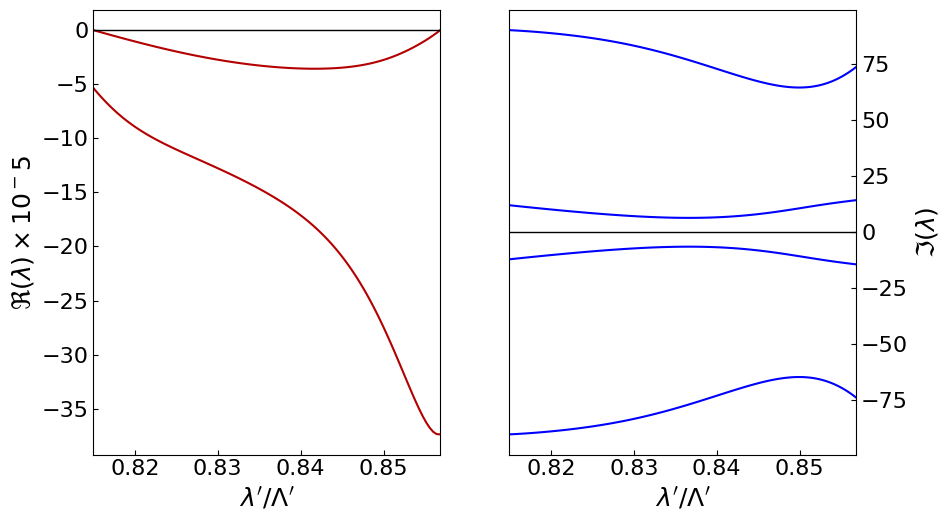

In [2]:
import numpy as np
from parameters import D1_ND
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

# grating_pitch       = 1.2269811605707412 
# grating_depth       = 1.0708522823419322 
# box1_width          = 0.14980809579234236
# box2_width          = 0.3138280437026498
# box_centre_dist     = 0.35635927218686275
# box1_eps            = 10.519396098913576
# box2_eps            = 2.1346426712249156 
# gaussian_width      = 27.588940241588944 
# substrate_depth     = 0.5382848080270162
# substrate_eps       = 9.27074177987814

grating_pitch       = 1.2269811605680625
grating_depth       = 1.0708522822331097
box1_width          = 0.14980809568967832
box2_width          = 0.3138280436942734
box_centre_dist     = 0.3563592721858686
box1_eps            = 10.519396098839394
box2_eps            = 2.1346426711459654
gaussian_width      = 27.58894024158397
substrate_depth     = 0.5382848081542992
substrate_eps       = 9.270741779881561


from twobox_updated import TwoBox

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 1., 0., 100, 25, np.inf)

wavelength_range = [1,1/D1_ND([5/100,0])]
n_plot = 100
grating.show_Eigs(False, False, wavelength_range, n_plot)

## Inkstone equivalent

In [14]:
from twobox_Inkstone import TwoBox_Inkstone
from twobox_updated import TwoBox
import numpy as np

grating_pitch       = 1.2269811605680625
grating_depth       = 1.0708522822331097
box1_width          = 0.14980809568967832
box2_width          = 0.3138280436942734
box_centre_dist     = 0.3563592721858686
box1_eps            = 10.519396098839394
box2_eps            = 2.1346426711459654
gaussian_width      = 27.58894024158397
substrate_depth     = 0.5382848081542992
substrate_eps       = 9.270741779881561

num = 100

grating_RCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 1., 0.1, 100, num, np.inf)
grating_inkstone = TwoBox_Inkstone(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                            gaussian_width, substrate_depth, substrate_eps,
                            1., 0.1, 100)

print("RCWA: eff\n", grating_RCWA.RT())
print(grating_RCWA.Eigs())
print("Inkstone: eff\n", grating_inkstone.eff())
print(grating_inkstone.Eigs())

RCWA: eff
 ([np.float64(0.015038074912545569), np.float64(0.02870460599544106), np.float64(0.2773752926542383)], [np.float64(0.6327331432713406), np.float64(0.017259424393037293), np.float64(0.028889458773570895)])
(array([-9.96031390e-05, -9.96031390e-05,  1.94255112e-05,  1.94255112e-05]), array([ 91.15215199, -91.15215199,  13.80725315, -13.80725315]))
Inkstone: eff
 (array([0.01392606, 0.03299106, 0.26627237]), array([0.63465627, 0.01627811, 0.03587613]))
(array([-8.87182458e-05, -8.87182458e-05,  2.03856841e-05,  2.03856841e-05]), array([ 90.4596386 , -90.4596386 ,  14.01810303, -14.01810303]))


## Here

In [1]:
from twobox_Inkstone import TwoBox_Inkstone
from twobox_updated import TwoBox
import numpy as np
from parameters import D1_ND

## Ilic-Atwater grating
# wavelength=1.5 #/D1_ND(0.0539)

# grating_pitch=1.8 / wavelength
# grating_depth=0.5 / wavelength
# box1_width=0.15 * grating_pitch
# box2_width=0.35 * grating_pitch
# box_centre_dist=0.60 * grating_pitch
# box1_eps = 3.5**2 
# box2_eps = 3.5**2
# gaussian_width=2 * 10
# substrate_depth=0.5 / wavelength
# substrate_eps=1.45**2

# wavelength=1

## First
# grating_pitch       = 1.2269811605680625
# grating_depth       = 1.0708522822331097
# box1_width          = 0.14980809568967832
# box2_width          = 0.3138280436942734
# box_centre_dist     = 0.3563592721858686
# box1_eps            = 10.519396098839394
# box2_eps            = 2.1346426711459654
# gaussian_width      = 27.58894024158397
# substrate_depth     = 0.5382848081542992
# substrate_eps       = 9.270741779881561

## First
grating_pitch       = 1.2269811605680625
grating_depth       = 1.0708522822331097
box1_width          = 0.14980809568967832
box2_width          = 0.3138280436942734
box_centre_dist     = 0.3563592721858686
box1_eps            = 10.519396098839394
box2_eps            = 2.1346426711459654
gaussian_width      = 27.58894024158397
substrate_depth     = 0.5382848081542992
substrate_eps       = 9.270741779881561

## Second
# grating_pitch   =   1.5384469388251338
# grating_depth   =   0.5580762361523982
# box1_width      =   0.10227122552871484
# box2_width      =   0.07605954942866577
# box_centre_dist =   0.2669020979549422
# box1_eps        =   9.614975107945112
# box2_eps        =   9.382304398409568
# gaussian_width  =   33.916288616522735
# substrate_depth =   0.17299998450776535
# substrate_eps   =   9.423032644325023


num = 25

grating_RCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 1., 0., 100, num, np.inf)
grating_inkstone = TwoBox_Inkstone(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                            gaussian_width, substrate_depth, substrate_eps,
                            1., 0., 100)

# print("RCWA") #: eff\n", grating_RCWA.RT())
# print(grating_RCWA.return_Qs_auto())
# print("Inkstone") #: eff\n", grating_inkstone.eff())
# print(grating_inkstone.return_Qs())

In [ ]:
_, _, p_fig, p_ax = grating_RCWA.show_permittivity(show_analytic_box=True)

## Ensure it's the *right* grating

In [46]:
## Second - left
grating_pitch   =   1.5384469388251338
grating_depth   =   0.5580762361523982
box2_width      =   0.10227122552871484
box1_width      =   0.07605954942866577
box_centre_dist =   0.2669020979549422
box2_eps        =   9.614975107945112
box1_eps        =   9.382304398409568
gaussian_width  =   33.916288616522735
substrate_depth =   0.17299998450776535
substrate_eps   =   9.423032644325023

num = 25

grating_left = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 1., 0., 100, num, np.inf)

grating_RCWA.wavelength=1.
print( grating_RCWA.Q() )
print( grating_left.Q() )

(np.float64(0.6258351751590173), np.float64(0.07646982950880396))
(np.float64(0.6274329745141178), np.float64(-0.07628036793404025))


In [51]:
wavelength = 1/D1_ND(5/100)
# np.arcsin( 1 - wavelength / grating_pitch)
0.3*180/np.pi

17.188733853924695

## Diffraction efficiencies +  Efficiency factors

Text(0.5, 0.98, "Efficiency factors at $\\lambda'=$ 1.02")

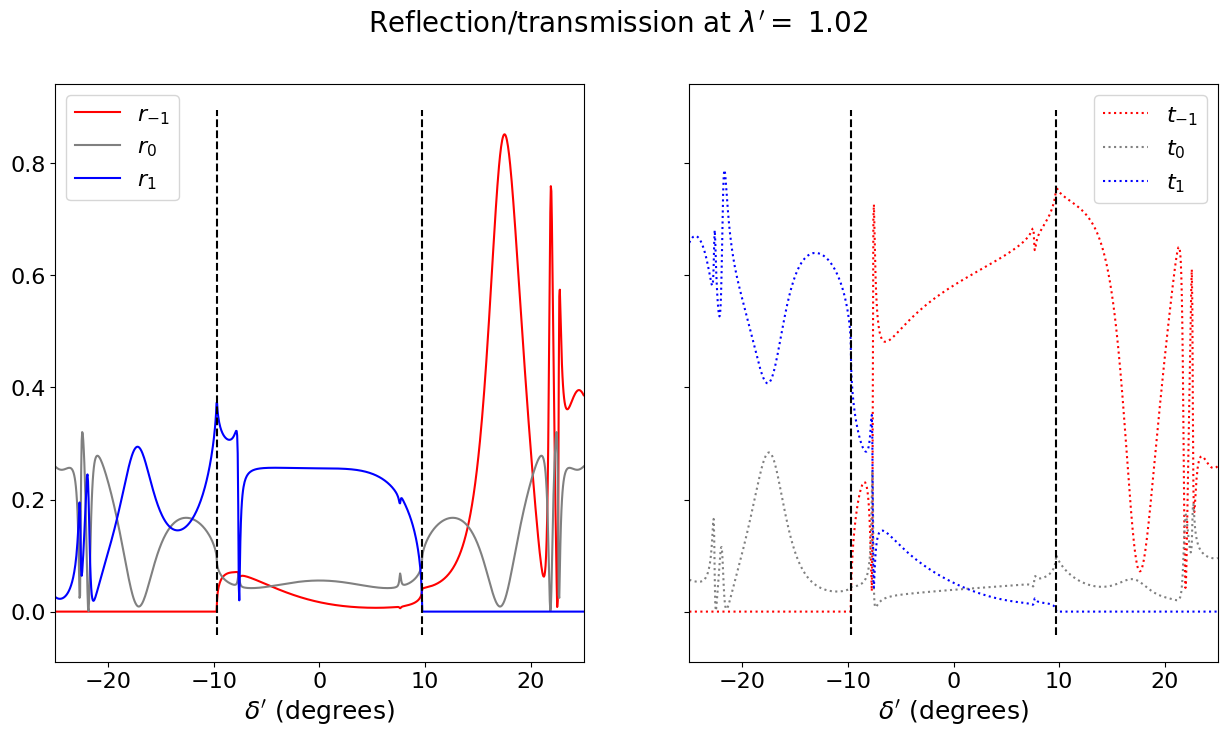

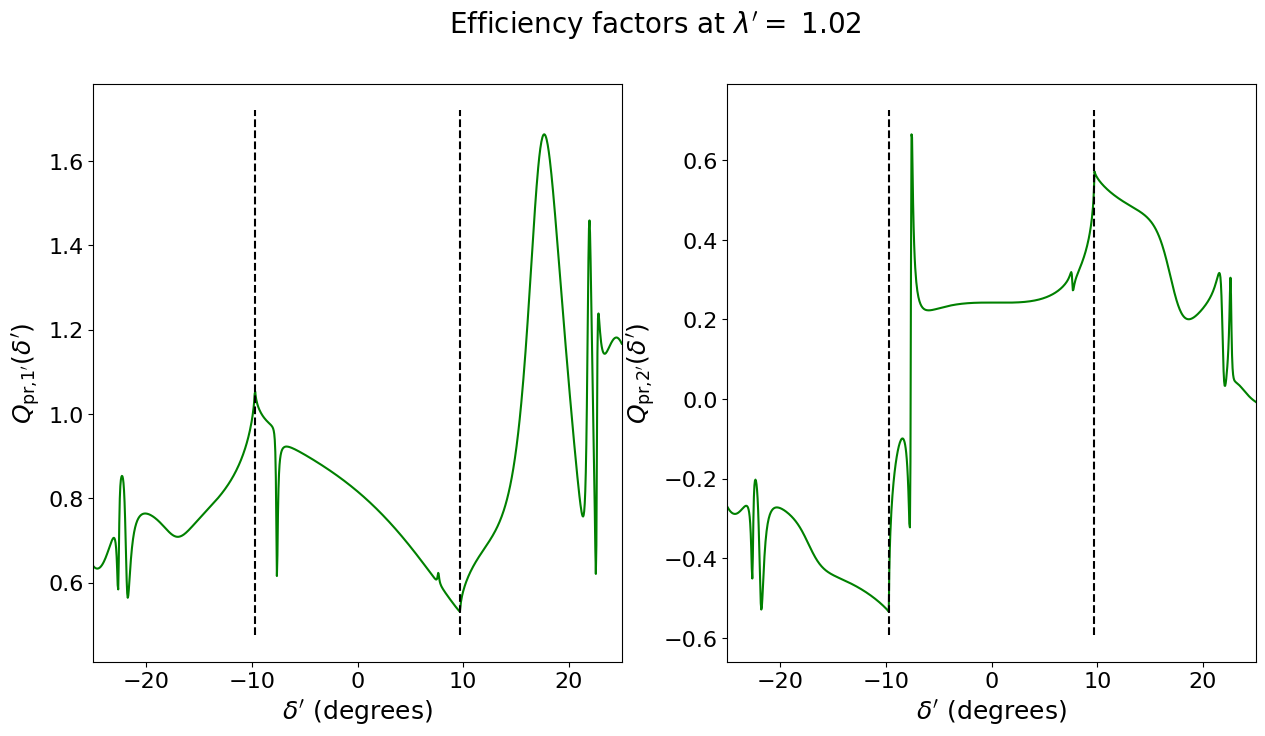

In [4]:
def Q(angle, r, t):
    def beta_m(m):
        test=(np.sin(angle)+m*wavelength/grating_pitch)
        if abs(test)>=1:
            delta_m="no_diffraction_order"
        else:
            delta_m=np.arcsin(test)
        return delta_m
    Q1=0
    Q2=0
    M=[-1,0,1]
    for m in range(len(M)):
        delta_m=beta_m(M[m])
        if isinstance(delta_m,str):
            Q1=Q1+0
            Q2=Q2+0
        else:
            Q1=Q1+ r[m]*(1+np.cos(angle+delta_m))+t[m]*(1-np.cos(delta_m-angle))
            Q2=Q2+ r[m]*np.sin(angle+delta_m)+t[m]*np.sin(delta_m-angle)
    Q1=np.cos(angle)*Q1
    Q2=-np.cos(angle)*Q2
    return Q1,Q2

import matplotlib.pyplot as plt
wavelength = 1.02
k = 1000
angles = (np.pi/180)*np.linspace(-25,25,k)

Q1_array = []
Q2_array = []

Rs = [] 
Ts = [] 

grating_RCWA.wavelength = wavelength
for i in range(k):
    angle = angles[i]
    grating_RCWA.angle = angle
    r, t = grating_RCWA.RT()

    Rs.append(r)
    Ts.append(t)

    Q1, Q2 = Q(angle, r, t)
    Q1_array.append(Q1)
    Q2_array.append(Q2)

Q1_array = np.array(Q1_array)
Q2_array = np.array(Q2_array)
Rs = np.array(Rs)
Ts = np.array(Ts)

#### Plotting

## Reflection/transmission
fig1, (ax, ax_) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax.plot((180/np.pi)*angles, Rs[:,0], color="red",                       label="$r_{-1}$")
ax_.plot((180/np.pi)*angles, Ts[:,0], color="red", linestyle="dotted",  label="$t_{-1}$")
ax.plot((180/np.pi)*angles, Rs[:,1], color="grey",                      label="$r_{0}$")
ax_.plot((180/np.pi)*angles, Ts[:,1], color="grey", linestyle="dotted", label="$t_{0}$")
ax.plot((180/np.pi)*angles, Rs[:,2], color="blue",                      label="$r_{1}$")
ax_.plot((180/np.pi)*angles, Ts[:,2], color="blue", linestyle="dotted", label="$t_{1}$")

ax.legend()
ax_.legend()

ax_ylims = ax.get_ylim()
ax__ylims = ax_.get_ylim()
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
ax.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax_.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x= cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x=-cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')

ax.set_xlabel("$\delta'$ (degrees)")
ax_.set_xlabel("$\delta'$ (degrees)")
fig1.suptitle(rf"Reflection/transmission at $\lambda'=$ {wavelength:.2f}")

## Efficiency factors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\delta')$")

fig.suptitle(rf"Efficiency factors at $\lambda'=$ {wavelength:.2f}")


## First derivatives

Text(0.5, 0.98, "$\\frac{\\partial Q}{\\partial \\lambda'}$ at $\\lambda'=$1.02")

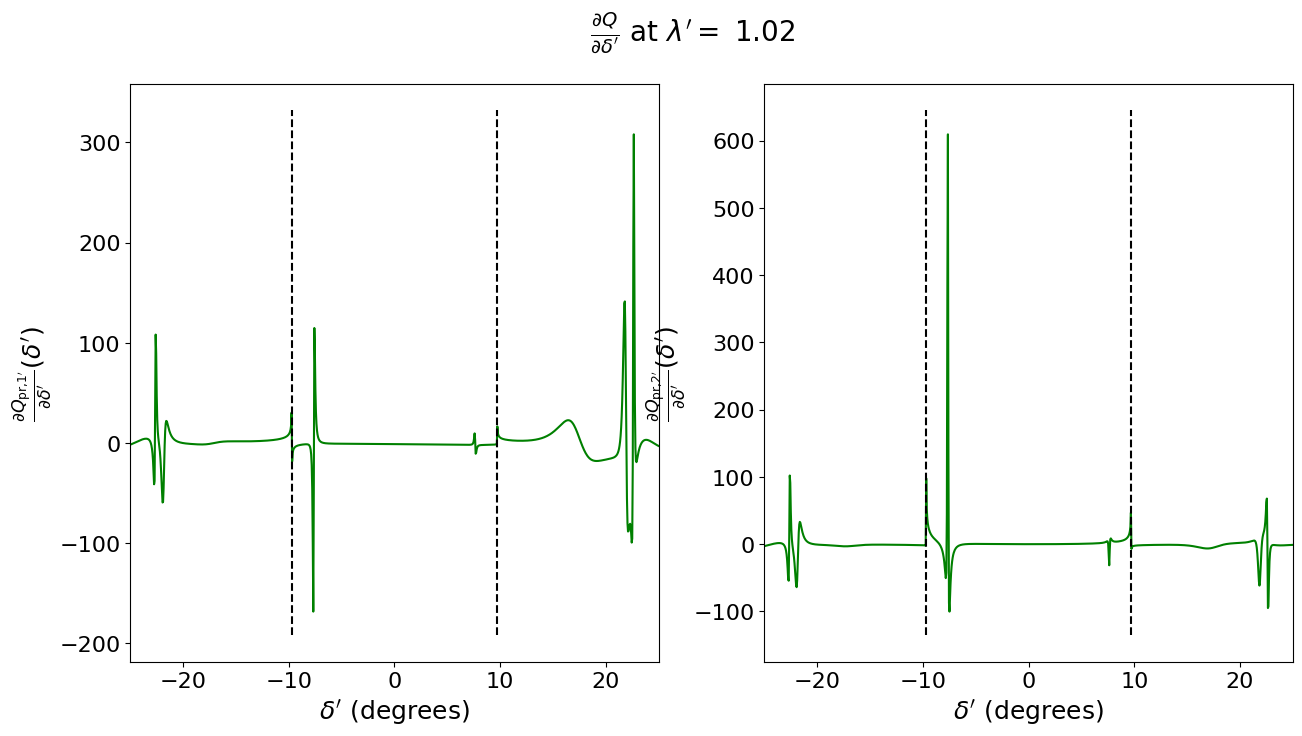

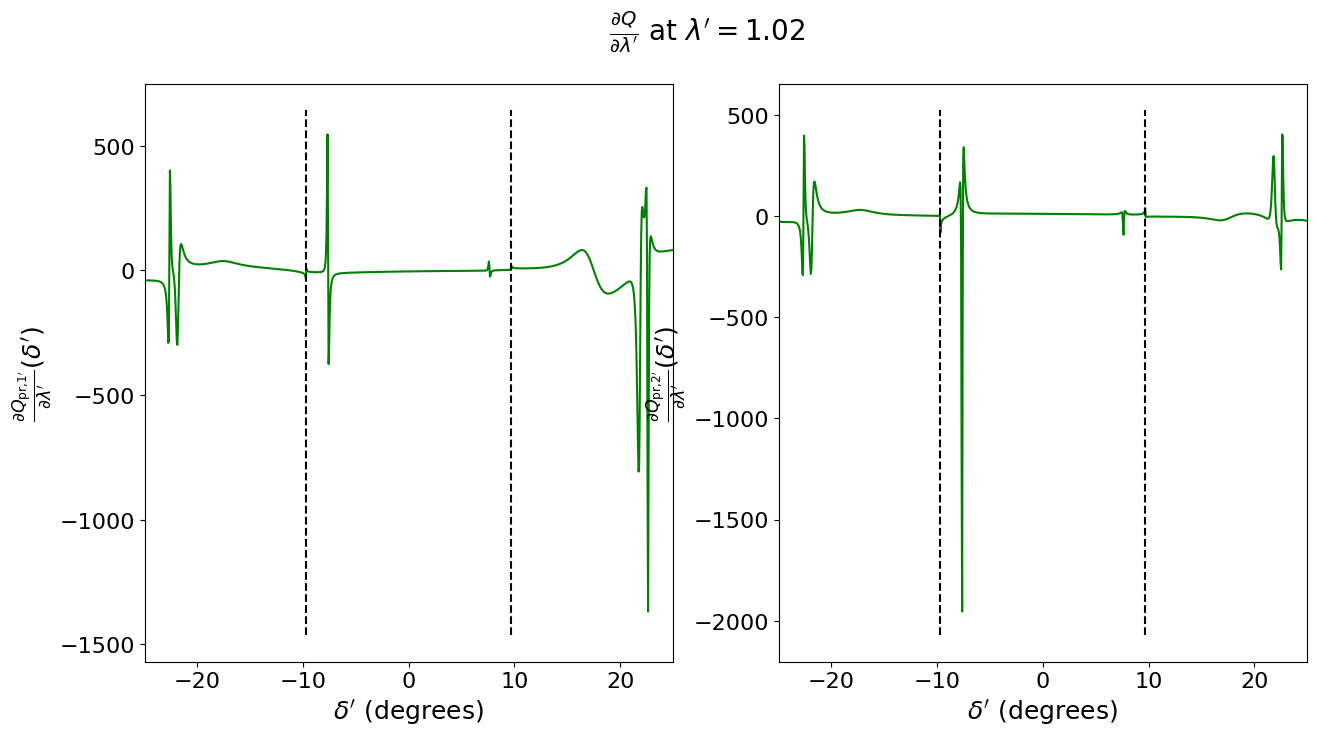

In [5]:
import matplotlib.pyplot as plt
wavelength = 1.02
k = 1000
angles = (np.pi/180)*np.linspace(-25,25,k)

PD_angle_Q1_array = []
PD_angle_Q2_array = []

PD_wavelength_Q1_array = []
PD_wavelength_Q2_array = []

grating_RCWA.wavelength = wavelength
for i in range(k):
    angle = angles[i]
    grating_RCWA.angle = angle
    PD_angle_Q1, PD_angle_Q2, PD_wavelength_Q1, PD_wavelength_Q2 = grating_RCWA.return_Qs_auto_noQ()

    PD_angle_Q1_array.append(PD_angle_Q1)
    PD_angle_Q2_array.append(PD_angle_Q2)
    PD_wavelength_Q1_array.append(PD_wavelength_Q1)
    PD_wavelength_Q2_array.append(PD_wavelength_Q2)

PD_angle_Q1_array = np.array(PD_angle_Q1_array)
PD_angle_Q2_array = np.array(PD_angle_Q2_array)
PD_wavelength_Q1_array = np.array(PD_wavelength_Q1_array)
PD_wavelength_Q2_array = np.array(PD_wavelength_Q2_array)

#### Plotting

## Angular derivatives
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, PD_angle_Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, PD_angle_Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel(r"$\frac{\partial Q_{\text{pr,1}'}}{\partial \delta'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel(r"$\frac{\partial Q_{\text{pr,2}'}}{\partial \delta'} (\delta')$")

fig.suptitle(t=(r"$\frac{\partial Q}{\partial \delta'}$ at $\lambda'=$"+rf" {wavelength:.2f}"))

## Wavelength derivatives
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, PD_wavelength_Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, PD_wavelength_Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel(r"$\frac{\partial Q_{\text{pr,1}'}}{\partial \lambda'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel(r"$\frac{\partial Q_{\text{pr,2}'}}{\partial \lambda'} (\delta')$")

fig.suptitle(t=(r"$\frac{\partial Q}{\partial \lambda'}$ at $\lambda'=$"+rf"{wavelength:.2f}"))


In [12]:
cutoff

np.float64(20.48693782809697)

In [14]:
f = rf"{wavelength:.2f}"
f+"cheese"

'1.00cheese'

Text(0.5, 0.98, "Efficiency factors at $\\lambda'=$ 1.02")

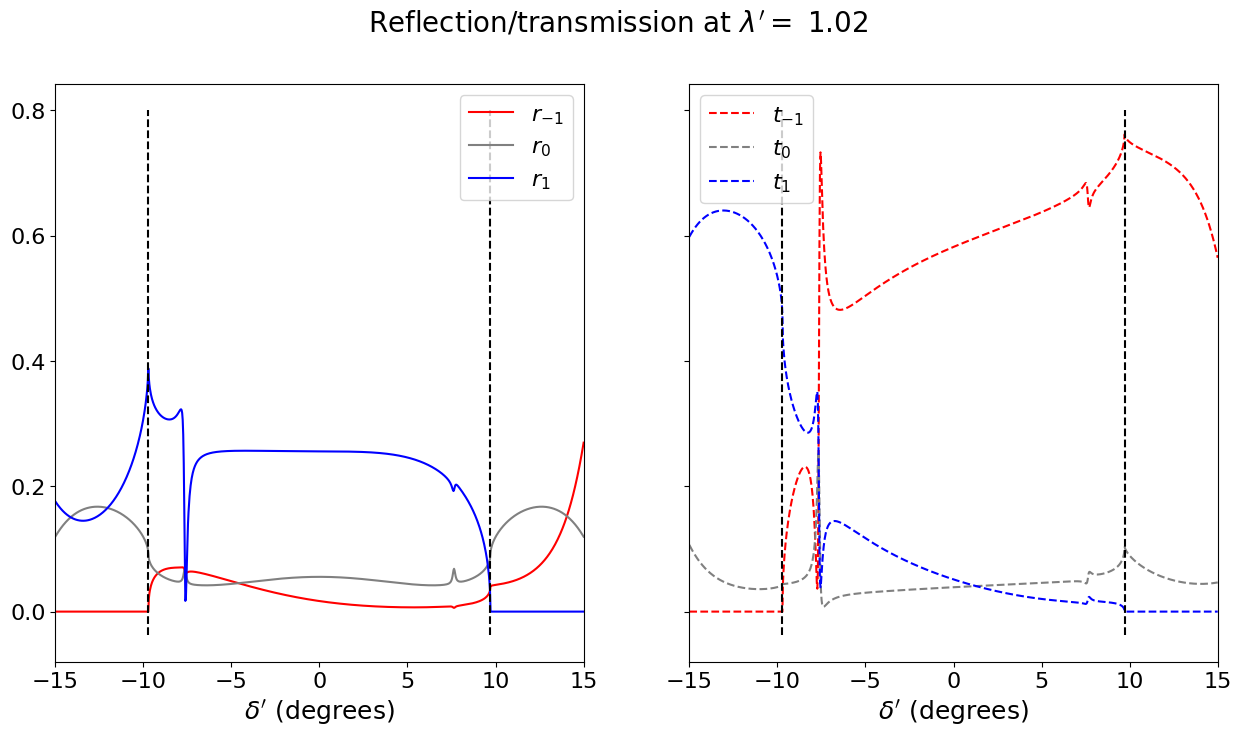

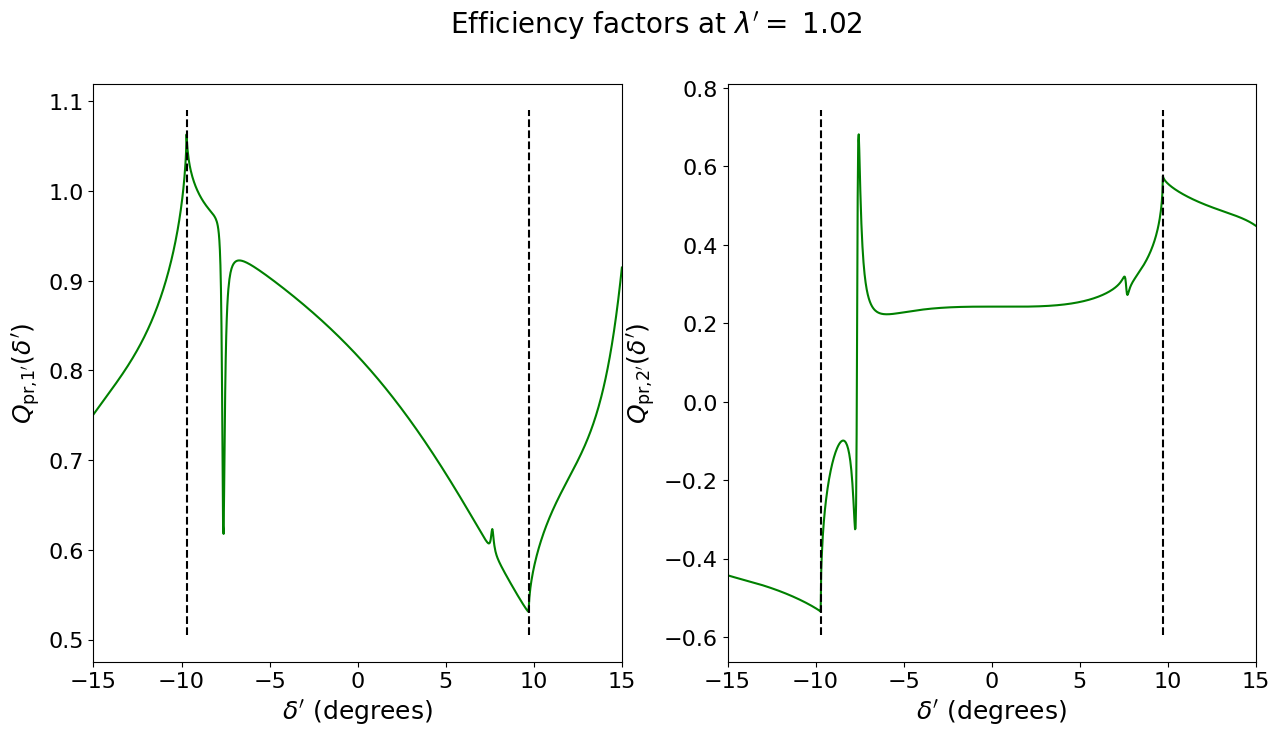

In [84]:
#### Plotting

## Reflection/transmission
fig1, (ax, ax_) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax.plot((180/np.pi)*angles, Rs[:,0], color="red",                       label="$r_{-1}$")
ax_.plot((180/np.pi)*angles, Ts[:,0], color="red", linestyle="dashed",  label="$t_{-1}$")
ax.plot((180/np.pi)*angles, Rs[:,1], color="grey",                      label="$r_{0}$")
ax_.plot((180/np.pi)*angles, Ts[:,1], color="grey", linestyle="dashed", label="$t_{0}$")
ax.plot((180/np.pi)*angles, Rs[:,2], color="blue",                      label="$r_{1}$")
ax_.plot((180/np.pi)*angles, Ts[:,2], color="blue", linestyle="dashed", label="$t_{1}$")

ax.legend()
ax_.legend()

ax_ylims = ax.get_ylim()
ax__ylims = ax_.get_ylim()
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
ax.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax_.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x= cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x=-cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')

ax.set_xlabel("$\delta'$ (degrees)")
ax_.set_xlabel("$\delta'$ (degrees)")
fig1.suptitle(rf"Reflection/transmission at $\lambda'=$ {wavelength:.2f}")


## Efficiency factors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\delta')$")

fig.suptitle(rf"Efficiency factors at $\lambda'=$ {wavelength:.2f}")

Text(0.5, 0.98, "Efficiency factors for $\\lambda'=$ 1.000")

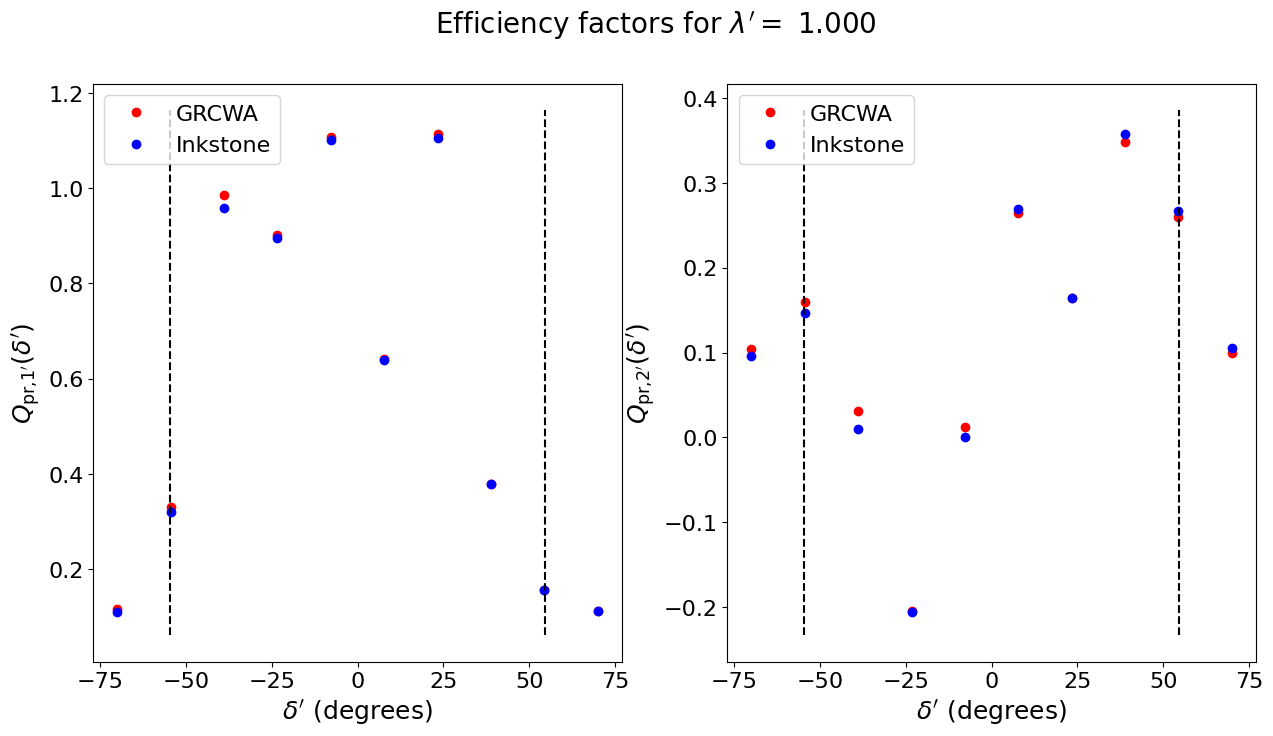

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, Q1_array,      'o', color="red",    label="GRCWA")
ax1.plot((180/np.pi)*angles, Q1_array_ink,  'o', color="blue",   label="Inkstone")
ax2.plot((180/np.pi)*angles, Q2_array,      'o', color="red",    label="GRCWA")
ax2.plot((180/np.pi)*angles, Q2_array_ink,  'o', color="blue",   label="Inkstone")

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()
cutoff = (180/np.pi) * np.arcsin( 1/ grating_pitch) 

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.legend()
ax2.legend()

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\delta')$")

fig.suptitle(rf"Efficiency factors for $\lambda'=$ {wavelength:.3f}")

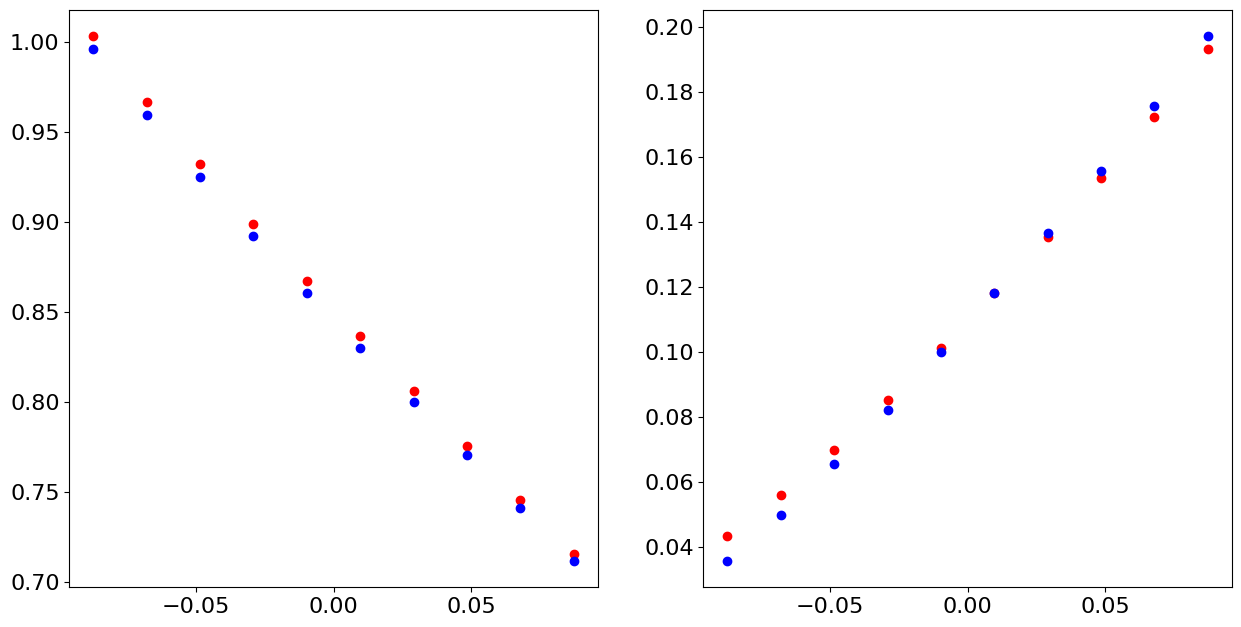

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(angles, Q1_array,      'o', color="red")
ax1.plot(angles, Q1_array_ink,  'o', color="blue")
ax2.plot(angles, Q2_array,      'o', color="red")
ax2.plot(angles, Q2_array_ink,  'o', color="blue")

In [3]:
grating_inkstone.angle = (180/np.pi)*np.linspace(-5,5,10)[0]
grating_inkstone.Q()

(np.float64(-1.2122269419072642), np.float64(-0.18923045785625517))

In [7]:
(180/np.pi)**2*np.linspace(-5,5,10)[0] % 360

np.float64(145.9682499412811)

In [47]:
grating_RCWA.angle = (180/np.pi)*np.linspace(-5,5,k)[0]
grating_RCWA.return_Qs()[0:2]

(np.float64(1.2130205979499071), np.float64(0.1947297756187999))

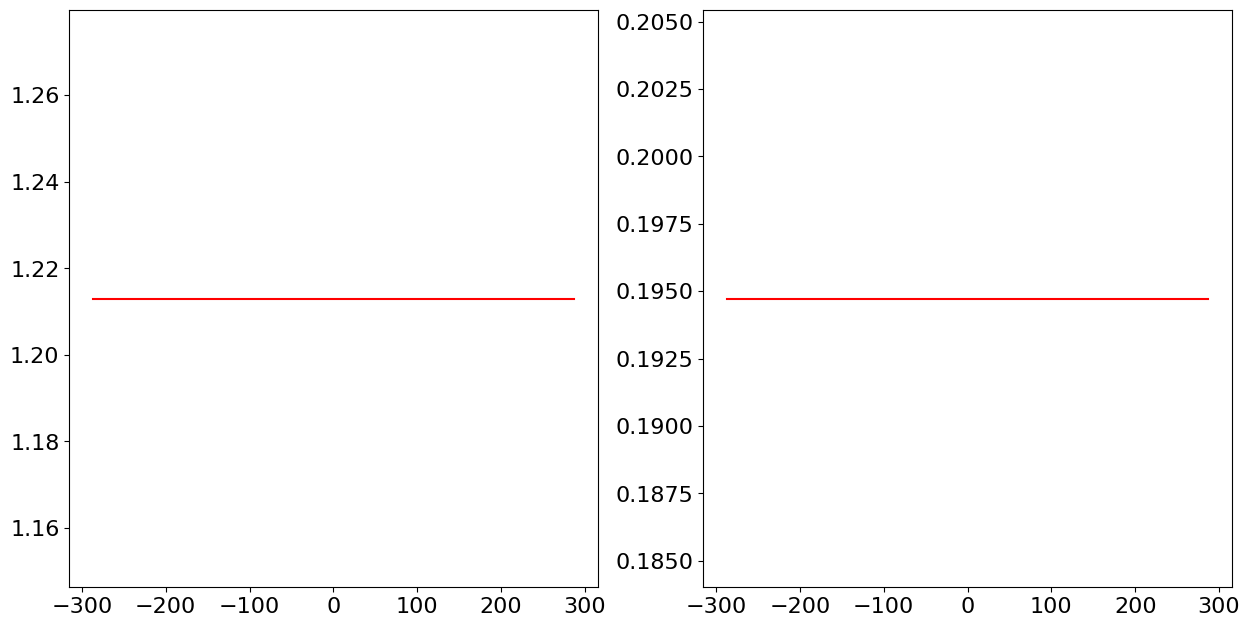

In [39]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(angles, Q1_array, color="red")
# ax1.plot(angles, Q1_array_ink, color="blue")
ax2.plot(angles, Q2_array, color="red")
# ax2.plot(angles, Q2_array_ink, color="blue")

In [35]:
Q1_array_ink

array([-1.21222694, -1.21222694, -1.21222694, -1.21222694, -1.21222694,
       -1.21222694, -1.21222694, -1.21222694, -1.21222694, -1.21222694])

In [30]:
grating_RCWA.return_Qs_auto()

(np.float64(1.2130205979499071),
 np.float64(0.1947297756187999),
 np.float64(-1.6557302270171141),
 np.float64(-2.0491187941975673),
 np.float64(-5.2969376453033155),
 np.float64(-1.546163792124928))

In [62]:
1/grating.grating_pitch

np.float64(0.8108578939815646)

In [50]:
(grating.box1_width+grating.box2_width)/2

np.float64(0.2576835937400873)

In [ ]:
## Trying to create #4 
Lam = grating.grating_pitch
w1 = grating.box1_width
w2 = grating.box2_width
bcd = grating.box_centre_dist
x1 = w1/2 + 0.02*Lam # box1 centre location (offset to avoid left box left edge clipping)    
x2 = x1 + bcd # box2 centre location    
eb1 = grating.box1_eps
eb2 = grating.box2_eps

In [40]:
grating.Eigs()

(array([-6.79442286e-05, -6.79442286e-05, -7.62200388e-06, -7.62200388e-06]),
 array([ 70.55181181, -70.55181181,   2.57429691,  -2.57429691]))

In [17]:
from autograd import numpy as npa
grating.wavelength = 0.6955 * grating.grating_pitch
EIGreal , EIGimag= grating.Eigs()

def unique_filled(x, filled_value):
    """
    Returns a 4-dimensional array with unique values from `x` and the remaining
    filled by `filled_value`.

    Parameters:
    x (np.ndarray): 4-dimensional input array.
    filled_value (float): Value to fill the remaining positions.

    Returns:
    np.ndarray: A 4-dimensional array of the same shape as `x`.
    """
    
    # Sorting ensures differentiability of np.unique
    sorted_x = npa.sort(x.flatten())
    unique_values = sorted_x[np.concatenate(([True], npa.diff(sorted_x) != 0))]

    k=len(unique_values)
    for i in range(4-k):
        unique_values=npa.append(unique_values,filled_value)

    return unique_values

##### First FoM - incl. product of unique, real eigenvalues
# func_real_array = unique_filled(EIGreal,1)
# func_real = func_real_array[0] * func_real_array[1] * func_real_array[2] * func_real_array[3]

##### Second FoM - product of real part, unless 0 or positive, where it's 0

# Reward all Re(eig) being negative
eig_real_unique     =   unique_filled( EIGreal, -1 )
eig_real_neg_unique =   npa.minimum( 0., eig_real_unique )
func_real_neg_array =   npa.power( eig_real_neg_unique , 2 )
func_real_neg       =   func_real_neg_array[0]  *   func_real_neg_array[1]  *   func_real_neg_array[2]  *   func_real_neg_array[3]

# Penalise any positive Re(eig)
eig_real_unique_0   =   unique_filled( EIGreal, 0 )
pos_eig_real_unique =   npa.maximum( 0., eig_real_unique_0 )
func_real_pos_array =   npa.power( pos_eig_real_unique , 2 )
func_real_pos       =   func_real_pos_array[0]  +   func_real_pos_array[1]  +   func_real_pos_array[2]  +   func_real_pos_array[3]  

func_real = func_real_neg - func_real_pos

func_imag_array = npa.power( npa.tanh(EIGimag) , 2 )
func_imag = func_imag_array[0] * func_imag_array[1] * func_imag_array[2] * func_imag_array[3]

FD = func_real * func_imag 

print(FD)
print(func_real_neg)

-234.569774539949
0.0


In [89]:
grating.wavelength=1
grating.Eigs()

(array([-1.72891993e-04, -1.72891993e-04,  7.94982363e-05,  7.94982363e-05]),
 array([ 124.06598367, -124.06598367,   14.00210445,  -14.00210445]))

In [83]:
Lam, _, _, _, bcd, _, _, _, _, _ = grating.params
# condition = bcd - 0.5*Lam
condition = np.abs(bcd - 0.25*Lam) - 0.25*Lam 
print(condition)

_, _, w1, w2, bcd, _, _, _, _, _ = grating.params
condition= (w1+w2)/2 - bcd 
print(condition)

Lam, _, w1, w2, bcd, _, _, _, _, _ = grating.params
condition = (w1+w2)/2 + bcd - 0.98*Lam
print(condition)

-0.36586282827400574
0.06995096248121058
-0.6305566546674984


## Trying to recreate

In [13]:
### IMPORTS ###
import sys
sys.path.append('../')

import pickle
from operator import itemgetter

## Extract the optimisation result ##
num_cores = 1
maxfev = 15


pkl_fname = f'./Data/test2_FOM_optimisation_maxfev{maxfev*num_cores}.pkl'
txt_fname = f'./Data/test2_FOM_optimisation_maxfev{maxfev*num_cores}_curated.txt'
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)


## Sort the maxima and maximisers based on value ##
opt_FOMs = data["FOM"]
opt_gratings = data["Optimised grating"]
opt_params = [grating.params for grating in opt_gratings]

maxima_and_maximisers = zip(opt_FOMs, opt_params)
maxima_and_gratings = zip(opt_FOMs, opt_gratings)

# Sort all local maxima from largest to smallest
maxima_and_maximisers_sorted = sorted(maxima_and_maximisers, key=itemgetter(0), reverse=True)
opt_gratings_sorted = sorted(maxima_and_gratings, key=itemgetter(0), reverse=True)

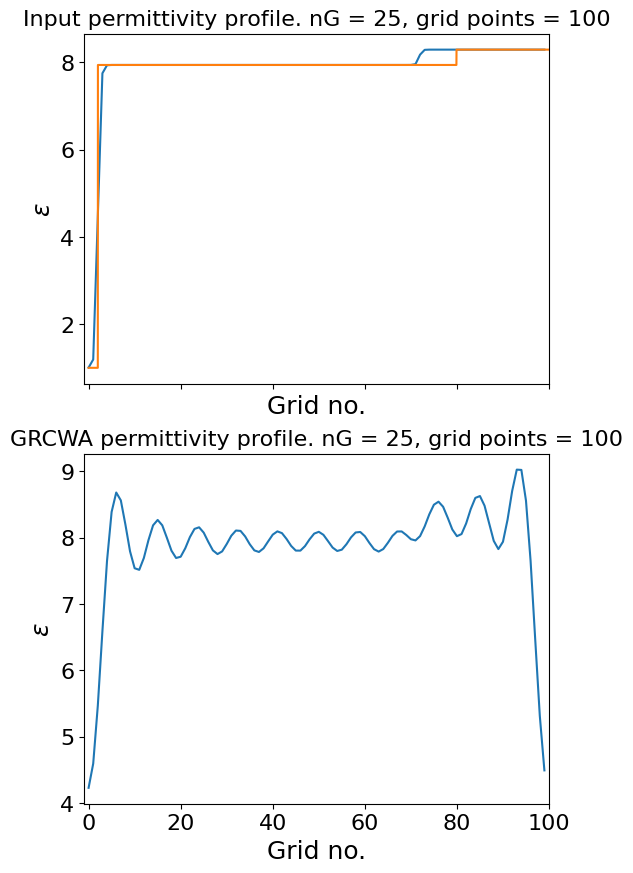

Grating parameters: [ 1.78444531  2.45019031  1.38992969  1.10882031  0.96045703  7.94335938
  8.29492188 47.5390625   1.47582422  7.94335938]
Grating FOM: 0.0


(<Figure size 684.055x577.428 with 1 Axes>,
 <Axes: title={'center': "$h_1' = 2.450\\lambda_0$, $\\Lambda' = 1.784\\lambda_0$"}, xlabel="$\\lambda'/\\Lambda'$", ylabel='FoM'>)

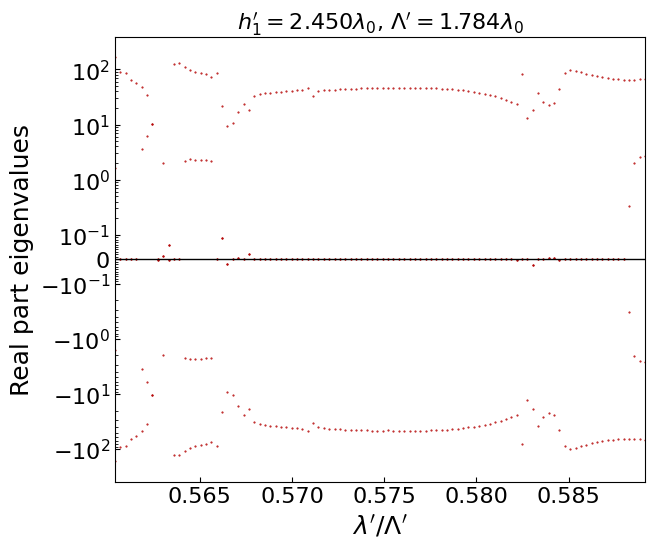

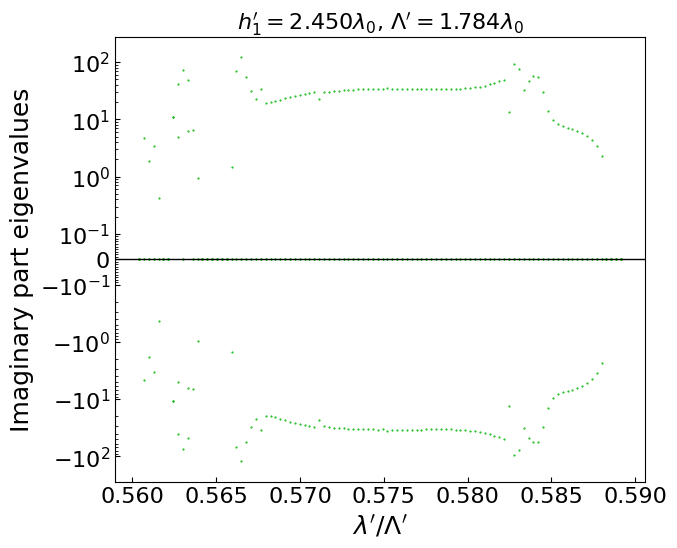

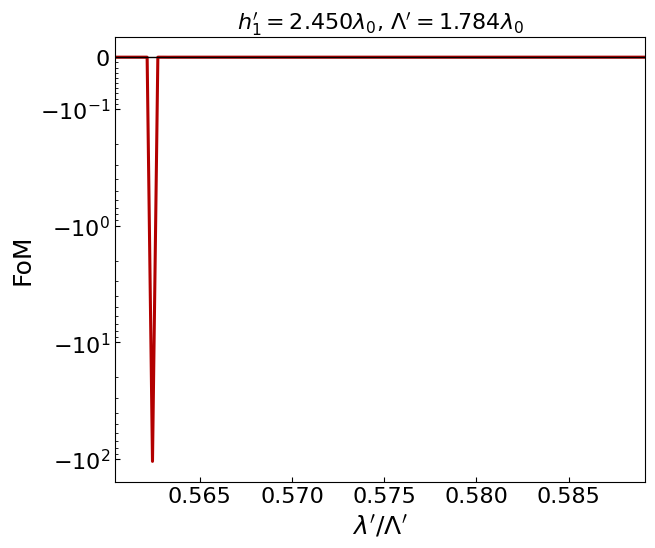

In [15]:
from copy import deepcopy
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 

from opt_updated import FOM_uniform
from parameters import D1_ND

optimum_number = 0
grating = deepcopy(opt_gratings_sorted[optimum_number][1])

# Test optimum convergence
grating.Qabs = np.inf
grating.nG = 25
grating.Nx = 100

wavelength_scale=1  # halve

grating.grating_pitch = grating.params[0] / wavelength_scale
grating.grating_depth = grating.params[1] / wavelength_scale
grating.box1_width = grating.params[2] / wavelength_scale
grating.box2_width = grating.params[3] / wavelength_scale
grating.box_centre_dist = grating.params[4] / wavelength_scale
grating.box1_eps = grating.params[5] 
grating.box2_eps = grating.params[6] 

grating.gaussian_width = grating.params[7] 
grating.substrate_depth = grating.params[8] / wavelength_scale
grating.substrate_eps = grating.params[9]

# grating.params = [0.816     , 1.30018377, 0.29543588, 0.0, 0.5, 0.0, 2.05772413, 1.0]
# grating.is_onebox = False

_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)
grating_FOM = FOM_uniform(grating, final_speed=5., goal=0.1, return_grad=False)
print(f"Grating parameters: {grating.params}")
print(f"Grating FOM: {grating_FOM}")

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([5/100,0])]
# wavelength_range =  [grating.grating_pitch*0.79,grating.grating_pitch* 0.798]
n_plot = 100

grating.show_spectrum(angle, "eig", wavelength_range, n_plot)
grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)
# # Save and display
# p_fname = f"Data/permittivity_optnum{optimum_number}"
# p_fig.savefig(p_fname+".pdf", bbox_inches='tight')
# p_fig.savefig(p_fname+".png", bbox_inches='tight')

# fname = f"Data/{quantity}_spectrum_optnum{optimum_number}_range{100*wavelength_range[0]:2.0f}-{100*wavelength_range[1]:2.0f}_pts{n_plot}"
# fig.savefig(fname+".pdf", bbox_inches='tight')
# fig.savefig(fname+".png", bbox_inches='tight')x

In [7]:
from parameters import Initial_bigrating
print(Initial_bigrating())
print(grating.params[0],grating.params[1],grating.params[2],grating.params[3],grating.params[4],grating.params[5],grating.params[6],
      grating.params[7],grating.params[8],grating.params[9])

(np.float64(1.3181953910424888), np.float64(0.9981573495961377), np.float64(0.3925889472885004), np.float64(0.10992496313652637), np.float64(0.46325492497782883), np.float64(2.3183598380520047), np.float64(2.6699220192321977), np.float64(25.03906252365165), np.float64(2.9915278797460836), np.float64(2.3183620304237067))
1.7844453125 2.4501903076171874 1.3899296875 1.1088203125 0.96045703125 7.943359375 8.294921875 47.5390625 1.47582421875 7.943359375


In [11]:
from parameters import Initial_bigrating
print(Initial_bigrating())
print(grating.params[0],grating.params[1],grating.params[2],grating.params[3],grating.params[4],grating.params[5],grating.params[6],
      grating.params[7],grating.params[8],grating.params[9])

(np.float64(1.3181953910424888), np.float64(0.9981573495961377), np.float64(0.3925889472885004), np.float64(0.10992496313652637), np.float64(0.46325492497782883), np.float64(2.3183598380520047), np.float64(2.6699220192321977), np.float64(25.03906252365165), np.float64(2.9915278797460836), np.float64(2.3183620304237067))
1.6068828125 2.4443338623046875 0.5153671875 0.23425781250000002 0.5231757812500001 4.427734375 7.591796875 33.4765625 1.28841796875 5.833984375


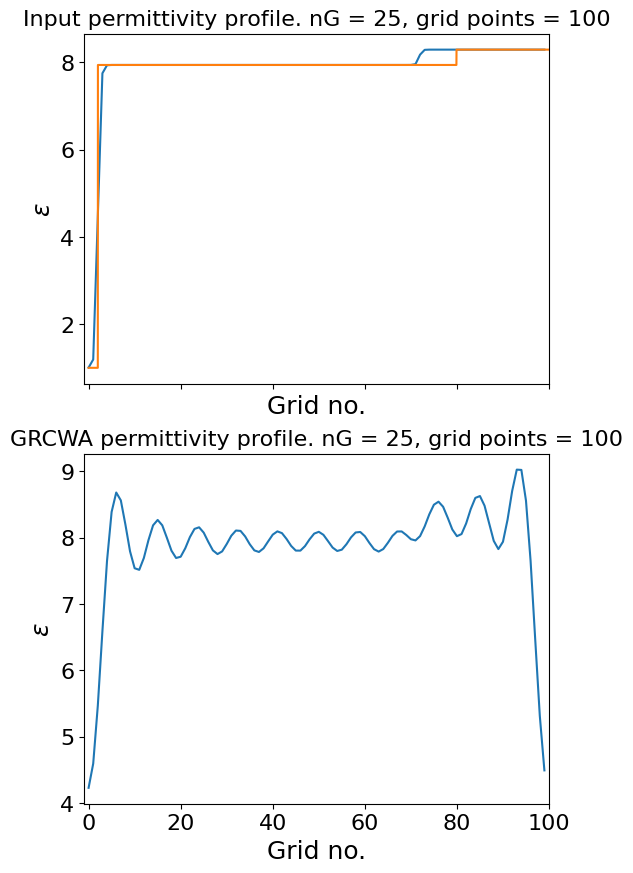

(np.float64(1.173011706753351e-32), np.float64(-0.0), np.float64(0.0), np.float64(-2.1763007994414477e-32), np.float64(3.192830735929465e-29), np.float64(0.0))
parameters [np.float64(1.0571756378765842), np.float64(1.29150903154519), np.float64(1.827210937715879), np.float64(0.7964765623632709), np.float64(0.2420664062036848), np.float64(1.0), np.float64(8.64648437498105), np.float64(42.61141879377803), np.float64(0.0), np.float64(1.132587922112922)]


In [20]:
from twobox_updated import TwoBox
grating_fail = TwoBox(np.float64(1.0571756378765842), np.float64(1.29150903154519), np.float64(1.827210937715879), np.float64(0.7964765623632709), np.float64(0.2420664062036848), np.float64(1.0), np.float64(8.64648437498105), 
                       np.float64(42.61141879377803), np.float64(0.0), np.float64(1.132587922112922),
                       wavelength=1., angle=0., Nx=100, nG=25, Qabs=1e5)

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([5/100,0])]
# wavelength_range =  [grating.grating_pitch*0.79,grating.grating_pitch* 0.798]
n_plot = 100

_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)
print(grating_fail.return_Qs() )
print("parameters", grating_fail.params)


In [3]:
import traceback

try:
    print(5 + "5")
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\llama\AppData\Local\Temp\ipykernel_107728\59474276.py", line 4, in <module>
    print(5 + "5")
          ~~^~~~~
TypeError: unsupported operand type(s) for +: 'int' and 'str'


In [4]:
## 13
_lam, _h, _w1, _w2, _bcd, _eps1, _eps2, width, sub, sub2 = np.array(grating.params, dtype=np.float64)
# init = np.array([_lam, _h, _w, _bcd, _eps])
print(grating.params)

## Conditions (required to be negative)

# bcd_not_redundant
condition = np.abs(_bcd - 0.25*_lam) - 0.25*_lam
print(condition)

# box_gaps_non_zero
condition= ( _w1 + _w2 )/2 - _bcd
print(condition)

# box_clips_cell_edge
condition = ( _w1 + _w2 )/2 + _bcd - 0.98*_lam
print(condition)


NameError: name 'grating' is not defined

In [20]:
_bcd - 0.25*_lam

np.float64(0.33517382812499996)

In [6]:
from parameters import Initial_bigrating
_lam, _h, _w1, _w2, _bcd, _eps1, _eps2, width, sub, sub2 = Initial_bigrating()

## Conditions (required to be negative)

# bcd_not_redundant
condition = np.abs(_bcd - 0.25*_lam) - 0.25*_lam
print(condition)

# box_gaps_non_zero
condition= ( _w1 + _w2 )/2 - _bcd
print(condition)

# box_clips_cell_edge
condition = ( _w1 + _w2 )/2 + _bcd - 0.98*_lam
print(condition)

-0.1958427705434156
-0.21199796976531543
-0.5773196030312968


In [16]:
## 27
_lam, _h, _w1, _w2, _bcd, _eps1, _eps2, width, sub, sub2 = np.array(grating.params, dtype=np.float64)
# init = np.array([_lam, _h, _w, _bcd, _eps])
print(grating.params)

## Conditions (required to be negative)

# bcd_not_redundant
condition = np.abs(_bcd - 0.25*_lam) - 0.25*_lam
print(condition)

# box_gaps_non_zero
condition= ( _w1 + _w2 )/2 - _bcd
print(condition)

# box_clips_cell_edge
condition = ( _w1 + _w2 )/2 + _bcd - 0.98*_lam
print(condition)


[ 1.78444531  2.54389343  1.38992969  1.10882031  0.96045703  7.94335938
  8.29492188 47.5390625   1.47582422  7.94335938]
0.06823437500000007
0.2889179687500001
0.46107562500000054


In [12]:
x=1
for i in x:
    print("yippee")

TypeError: 'int' object is not iterable

In [24]:
# 27
_lam, _h, _w1, _w2, _bcd, _eps1, _eps2, width, sub, sub2 = np.array(grating.params, dtype=np.float64)
# init = np.array([_lam, _h, _w, _bcd, _eps])
print(grating.params)

## Conditions (required to be negative)

print("period: ", _lam)

# bcd_not_redundant
condition = np.abs(_bcd - 0.25*_lam) - 0.25*_lam
print(condition)

# box_gaps_non_zero
condition= ( _w1 + _w2 )/2 - _bcd
print(condition)

# box_clips_cell_edge
condition = ( _w1 + _w2 )/2 + _bcd - 0.98*_lam
print(condition)


[ 1.78444531  2.54389343  1.38992969  1.10882031  0.96045703  7.94335938
  8.29492188 47.5390625   1.47582422  7.94335938]
period:  1.7844453125
0.06823437500000007
0.2889179687500001
0.46107562500000054


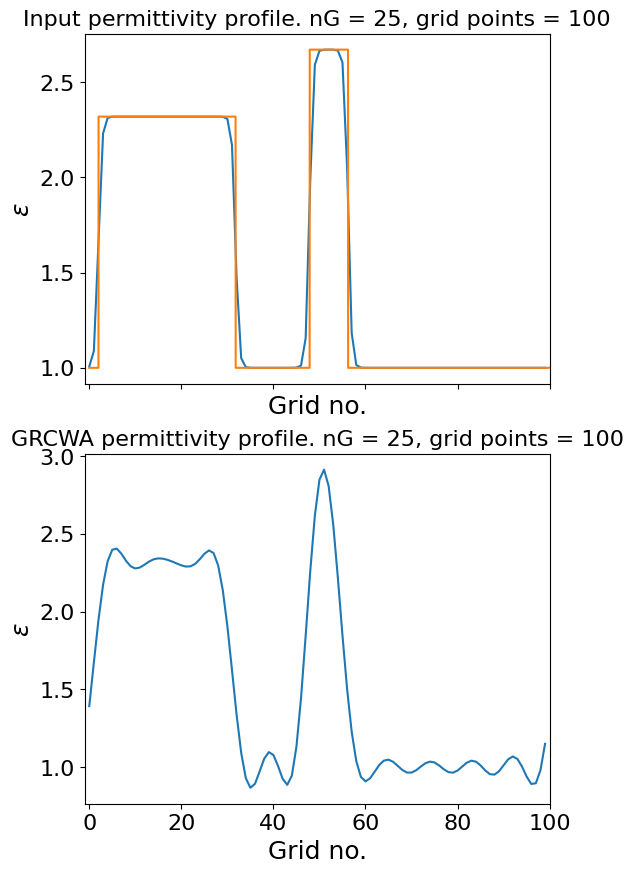

Grating parameters: [ 1.31094532  0.99266748  0.39042971  0.10932038  0.46070702  2.31835984
  2.66992202 25.03906252  2.97507448  2.31836203]
Grating FOM: 2.0546935428846813e-09


(<Figure size 684.055x577.428 with 1 Axes>,
 <Axes: title={'center': "$h_1' = 0.998\\lambda_0$, $\\Lambda' = 1.318\\lambda_0$"}, xlabel="$\\lambda'/\\Lambda'$", ylabel='FoM'>)

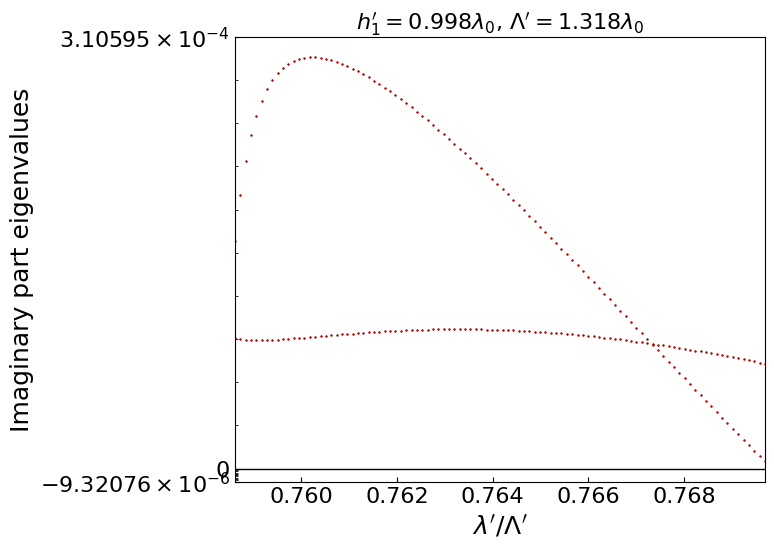

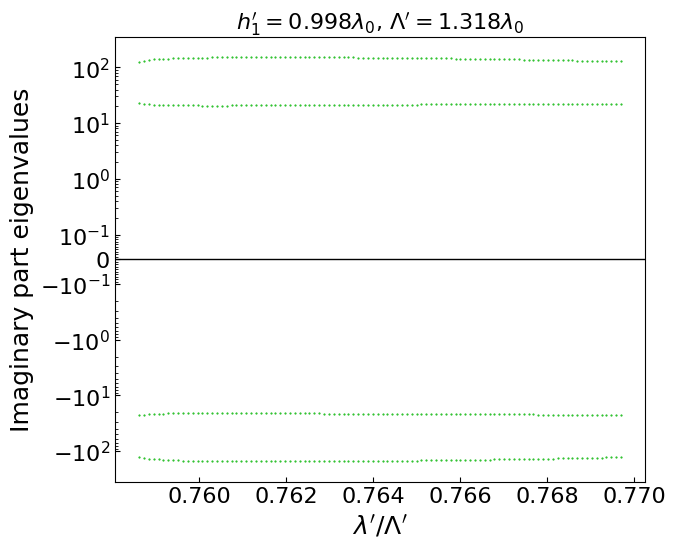

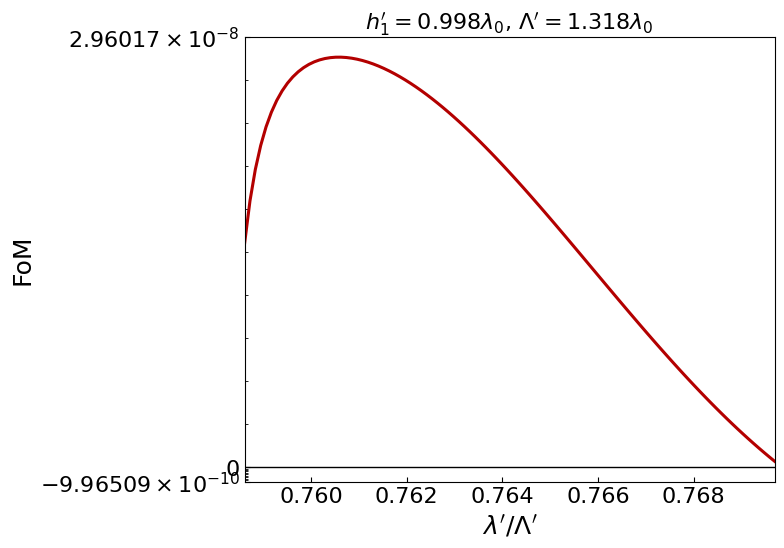

In [42]:
from copy import deepcopy
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 

from opt_updated import FOM_uniform
from parameters import D1_ND

optimum_number = 1
grating = deepcopy(opt_gratings_sorted[optimum_number][1])

# Test optimum convergence
grating.Qabs = np.inf
grating.nG = 25
grating.Nx = 100

wavelength_scale=0.9945  # halve

grating.grating_pitch = grating.params[0] / wavelength_scale
grating.grating_depth = grating.params[1] / wavelength_scale
grating.box1_width = grating.params[2] / wavelength_scale
grating.box2_width = grating.params[3] / wavelength_scale
grating.box_centre_dist = grating.params[4] / wavelength_scale
grating.box1_eps = grating.params[5] 
grating.box2_eps = grating.params[6] 

grating.gaussian_width = grating.params[7] 
grating.substrate_depth = grating.params[8] / wavelength_scale
grating.substrate_eps = grating.params[9]

# grating.params = [0.816     , 1.30018377, 0.29543588, 0.0, 0.5, 0.0, 2.05772413, 1.0]
# grating.is_onebox = False

_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)
grating_FOM = FOM_uniform(grating, final_speed=8., goal=0.1, return_grad=False)
print(f"Grating parameters: {grating.params}")
print(f"Grating FOM: {grating_FOM}")

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([1.45/100,0])]
# wavelength_range =  [grating.grating_pitch*0.79,grating.grating_pitch* 0.798]
n_plot = 100

grating.show_spectrum(angle, "eig", wavelength_range, n_plot)
grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)
# # Save and display
# p_fname = f"Data/permittivity_optnum{optimum_number}"
# p_fig.savefig(p_fname+".pdf", bbox_inches='tight')
# p_fig.savefig(p_fname+".png", bbox_inches='tight')

# fname = f"Data/{quantity}_spectrum_optnum{optimum_number}_range{100*wavelength_range[0]:2.0f}-{100*wavelength_range[1]:2.0f}_pts{n_plot}"
# fig.savefig(fname+".pdf", bbox_inches='tight')
# fig.savefig(fname+".png", bbox_inches='tight')x

In [61]:
print(grating.substrate_eps)

2.3183620304237067


In [24]:
# grating.average_real_eigs(5,0.1,return_eigs=False)
grating.Eigs()

(array([ 8.40208822e+01, -8.40210317e+01, -2.83294997e-04, -2.83294997e-04]),
 array([  0.        ,   0.        ,  40.93524831, -40.93524831]))

In [16]:
grating.wavelength / grating.grating_pitch

np.float64(0.6223229175276277)

In [ ]:
from twobox_updated import TwoBox
grating_copy=TwoBox()

In [12]:
print( (grating.box1_width+ grating.box2_width)/2 )
print( grating.box_centre_dist )

1.2460532841502743
0.9587626144837337


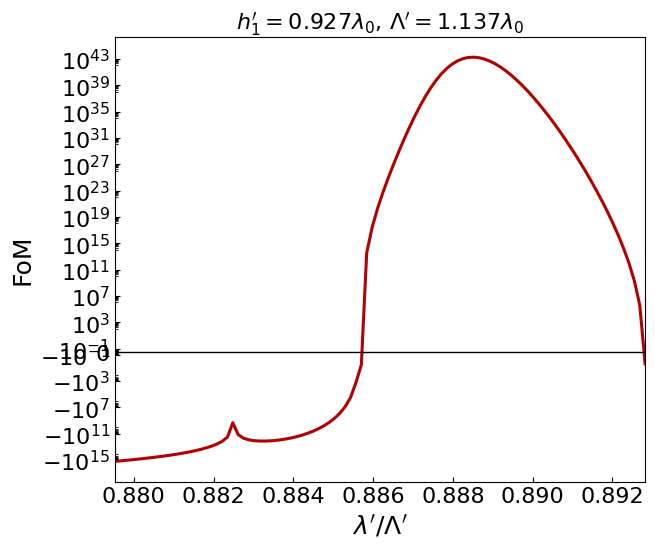

In [33]:
# wavelength_range = [grating.grating_pitch*0.79,grating.grating_pitch* 0.798]
n_plot = 100

fig, ax = grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)

In [40]:
grating.wavelength=0.89
a=grating.Eigs()[0]
print(grating.FoM())
print(a)
b=a#np.array([4,5,-100,5])

FD=1
for i in range(len(b)):
    FD=FD*(1 - np.exp(-b[i]))
# print(FD)
FD2=FD
for i in range(len(b)):
    k=np.log( 1 + np.exp(3*b[i]) )
    print(k)
    FD2 = FD2 - k
print(FD2)

7.003570744693896e+38
[ 44.72200112  44.72200112 -44.72232683 -44.72232683]
134.16600335229586
134.16600335229586
0.0
0.0
7.003570744693896e+38


In [74]:
# a=np.array([ 44.72200112,  44.72200112, -44.72232683, -44.72232683])
a=np.array([ 44.72200112,  44.72200112, -44.72232683, -44.72232683])
# a= np.array([ 44, -44])
def f(x):
    FD=1
    for i in range(len(x)):
        FD=FD*(1 - np.exp( - x[i] ))
    for i in range(len(x)):
        FD=FD - np.log( 1 + np.exp(3*x[i]) )
    return FD
# print(f(np.array([a[0],a[1]])))
# print(f(np.array([a[2],a[3]])))
print("Function value:",f(a))

Function value: 7.003570750619916e+38


In [48]:
b[0]

np.float64(44.72200111743195)

In [12]:
print(a[0])
print(np.log(1 + np.exp(3*a[0])))

64.8430028760703
194.5290086282109


In [38]:
# print(grating.grating_pitch)
# print( (grating.box1_width+grating.box2_width)/2 - grating.box_centre_dist)
grating.wavelength=0.794*grating.grating_pitch
print(grating.Eigs())
print(grating.FoM())
# grating.wavelength=0.798*grating.grating_pitch
# print(grating.Eigs())

(array([-1.81584225e-04, -1.81584225e-04, -4.58695726e-05, -4.58695726e-05]), array([ 62.54618676, -62.54618676,  29.88193702, -29.88193702]))
-1.22672894267427


In [13]:
# Reig=grating.Eigs()[0]

Reig=np.array([-200,-200,-200,-200])

FD=0
for i in range(len(Reig)):
    # FD=FD*(EIGreal[i] - npa.abs(EIGreal[i])) *  npa.abs(EIGimag[i]) ** (1/3) 
    Reigvalue=Reig[i]
    FD = FD + ( - np.exp(Reigvalue) + np.log( 1 + np.exp(-Reigvalue) ))
print(FD)

800.0


In [60]:
from autograd import numpy as npa 
from autograd.numpy import linalg as npaLA
from autograd import grad


def func(x):
    print("cheese")
    return npa.sqrt(x)

fd = grad(func)

fd(4.)

# M = npa.array([[0,1],[0,1]]) 
# # fd = grad(npaLA.det)

# check = npaLA.det(M)
# if check==0:
#     print("This one here, chief")


cheese


np.float64(0.25)

In [50]:
"""
Contains the radiation pressure cross-sections and user-defined figure of merit functions. Also contains the functions that optimise
a structure with given search-space bounds.
"""


# IMPORTS ########################################################################################################################
import adaptive as adp

import autograd.numpy as npa
from autograd import grad
from autograd.scipy.special import erf as autograd_erf
from autograd.numpy import linalg as npaLA

import numpy as np
import nlopt

import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 

from parameters import Parameters, D1_ND
from twobox_updated import TwoBox

I0, L, m, c = Parameters()



# FUNCTIONS ########################################################################################################################

def FD(grating: TwoBox) -> float:
    """
    Calculate the grating single-wavelength figure of merit FD.

    Parameters
    ----------
    grating :           TwoBox instance containing the grating parameters
    gaussian_width :    Width of gaussian beam
    """
    
    Q1,Q2,PD_Q1_angle,PD_Q2_angle,PD_Q1_wavelength,PD_Q2_wavelength=grating.return_Qs()
    w=grating.gaussian_width
    w_bar=w/L

    # Starting wavelength set to 1
    lam=grating.wavelength  # needs to be lambda'

    D=1/lam 
    g=(npa.power(lam,2) + 1)/(2*lam) 

    # Set-up (not sure about whether left or right makes sense - constraints)
    Q1R=Q1; Q2R=Q2; PD_Q1R_angle=PD_Q1_angle;   PD_Q2R_angle=PD_Q2_angle
    PD_Q1R_omega=(lam/D)*PD_Q1_wavelength;   PD_Q2R_omega=(lam/D)*PD_Q2_wavelength

    # Symmetry
    Q1L=Q1R 
    Q2L= - Q2R

    PD_Q1L_angle= - PD_Q1R_angle
    PD_Q2L_angle=PD_Q2R_angle

    PD_Q1L_omega=PD_Q1R_omega
    PD_Q2L_omega= - PD_Q2R_omega


    ####################################
    # y acc
    fy_y= -     D**2 * (I0/(m*c)) * ( Q2R - Q2L) * ( 1 - npa.exp( -1/(2*w_bar**2) ))
    fy_phi= -   D**2 * (I0/(m*c)) * ( PD_Q2R_angle + PD_Q2L_angle) * (w/2) * npa.sqrt( npa.pi/2 ) * autograd_erf( 1/(w_bar*npa.sqrt(2)) )
    fy_vy= -    D**2 * (I0/(m*c)) * (D+1)/(D* (g+1)) * ( Q1R + Q1L + PD_Q1R_angle + PD_Q1L_angle ) * (w/2) * npa.sqrt( np.pi/2 ) * autograd_erf( 1/(w_bar*npa.sqrt(2)) )
    fy_vphi=    D**2 * (I0/(m*c)) * ( 2*( Q2R - Q2L ) - D*( PD_Q2R_omega - PD_Q2L_omega ) ) * (w/2)**2 * ( 1 - npa.exp( -1/(2*w_bar**2) ))

    ####################################
    # phi acc
    fphi_y=     D**2 * (12*I0/( m*c*L**2)) * ( Q1R + Q1L ) * (  (w/2)*npa.sqrt( npa.pi/2 )  * autograd_erf( 1/(w_bar*npa.sqrt(2)))  - (L/2)* npa.exp( -1/(2*w_bar**2) )  ) 
    fphi_phi=   D**2 * (12*I0/( m*c*L**2)) * ( PD_Q1R_angle - PD_Q1L_angle - ( Q2R - Q2L ) ) * (w/2)**2 * ( 1 - npa.exp( -1/(2*w_bar**2) ))
    fphi_vy=    D**2 * (12*I0/( m*c*L**2)) * ( PD_Q1R_angle - PD_Q1L_angle - ( Q2R - Q2L ) ) * (w/2)**2 * ( 1 - npa.exp( -1/(2*w_bar**2) )) * (D+1)/(D* (g+1))
    fphi_vphi= -D**2 * (12*I0/( m*c*L**2)) * ( 2*( Q1R + Q1L ) - D*( PD_Q1R_omega + PD_Q1L_omega ) ) * (w/2)**2 * (  (w/2)*npa.sqrt( np.pi/2 )  * autograd_erf( 1/(w_bar*npa.sqrt(2)))  - (L/2)* npa.exp( -1/(2*w_bar**2) )  ) 

    # Build the Jacobian matrix
    J00=fy_y;   J01=fy_phi;     J02=fy_vy/c;    J03=fy_vphi/c
    J10=fphi_y; J11=fphi_phi;   J12=fphi_vy/c;  J13=fphi_vphi/c
    J=npa.array([[0,0,1,0],[0,0,0,1],[J00,J01,J02,J03],[J10,J11,J12,J13]])

    # Find the real part of eigenvalues    
    EIGVALVEC=npaLA.eig(J)
    eig=EIGVALVEC[0]
    EIGreal=npa.real(eig)
    EIGimag=npa.imag(eig)

    check = npaLA.det(J)
    if check==0:
        print("Grating parameters: ", grating.params)
        print("lam: ", lam)
        print("Qs: ", Q1,Q2,PD_Q1_angle,PD_Q2_angle,PD_Q1_wavelength,PD_Q2_wavelength)
        print("Jacobian matrix: ",J) 
        print("Eigenvalues: ", eig)
        print("\n")
        
    ## Product of real part eigenvalues

    def unique_filled(x, filled_value):
        """
        Returns a 4-dimensional array with unique values from `x` and the remaining
        filled by `filled_value`.

        Parameters:
        x (np.ndarray): 4-dimensional input array.
        filled_value (float): Value to fill the remaining positions.

        Returns:
        np.ndarray: A 4-dimensional array of the same shape as `x`.
        """
        
        # Sorting ensures differentiability of np.unique
        sorted_x = npa.sort(x.flatten())
        unique_values = sorted_x[np.concatenate(([True], npa.diff(sorted_x) != 0))]

        k=len(unique_values)
        for i in range(4-k):
            unique_values=npa.append(unique_values,filled_value)

        return unique_values

    func_real_array = unique_filled(EIGreal,1)
    func_real = func_real_array[0] * func_real_array[1] * func_real_array[2] * func_real_array[3]
    
    #func_imag_array = npa.power( npa.tanh(EIGimag) , 2 )
    #func_imag = func_imag_array[0] * func_imag_array[1] * func_imag_array[2] * func_imag_array[3]
    
    # FD = func_real * func_imag
    FD = func_real

    return FD

def FD_params_func(grating, params):    # , symboxes: bool=False, onebox: bool=False
    grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, gaussian_width, substrate_depth, substrate_eps = params
    
    grating.grating_pitch = grating_pitch
    grating.grating_depth = grating_depth
    grating.box1_width = box1_width
    grating.box2_width = box2_width
    grating.box_centre_dist = box_centre_dist
    grating.box1_eps = box1_eps
    grating.box2_eps = box2_eps
    
    grating.gaussian_width=gaussian_width
    grating.substrate_depth = substrate_depth
    grating.substrate_eps = substrate_eps

    return FD(grating)

FD_grad = grad(FD_params_func, argnum=1)


def FOM_uniform(grating: TwoBox, final_speed: float=20., goal: float=0.1, return_grad: bool=True) -> float:
    """
    Calculate wavelength expectation of FD FOM (figure of merit) for the given grating over a fixed wavelength range.
    Assumes a uniform probability distribution for wavelength.

    Parameters
    ----------
    grating     :   TwoBox instance containing the grating parameters
    final_speed :   Final sail speed as percentage of light speed
    goal        :   Stopping goal for wavelength integration passed to adaptive runner. If int, use npoints_goal; if float, use loss_goal.
    return_grad :   Return [FOM, FOM gradient]
    """
    laser_wavelength = grating.wavelength # copy the starting wavelength
    Doppler = D1_ND([final_speed/100,0])
    l_min = 1 # l = grating frame wavelength normalised to laser frame wavelength
    l_max = l_min/Doppler    
    l_range = (l_min, l_max)

    # Perturbation probability density function (PDF)
    PDF_unif = 1/(l_max-l_min)
    
    # Define a one argument function to pass to learner
    def weighted_FD(l):
        grating.wavelength = l*laser_wavelength
        return PDF_unif*FD(grating)
    
    # Adaptive sample FD
    FD_learner = adp.Learner1D(weighted_FD, bounds=l_range)
    if isinstance(goal, int):
        FD_runner = adp.runner.simple(FD_learner, npoints_goal=goal)
    elif isinstance(goal, float):
        FD_runner = adp.runner.simple(FD_learner, loss_goal=goal)
    else: 
        raise ValueError("Sampling goal type not recognised. Must be int for npoints_goal or float for loss_goal.")
    
    FD_data = FD_learner.to_numpy()
    l_vals = FD_data[:,0]
    weighted_FDs = FD_data[:,1]
    
    FOM = np.trapz(weighted_FDs,l_vals)

    if return_grad:
        """
        Should return FOM (average FD over wavelength) gradient at the given grating parameters.

        Implemented by first calculating the gradient at the grating parameters then averaging the gradient over wavelength
        """
        
        # Need to copy the following immutable parameters to pass to FD_grad, otherwise get UFuncTypeError
        grating_pitch = grating.grating_pitch
        grating_depth = grating.grating_depth
        box1_width = grating.box1_width
        box2_width = grating.box2_width
        box_centre_dist = grating.box_centre_dist
        box1_eps = grating.box1_eps
        box2_eps = grating.box2_eps
        
        gaussian_width=grating.gaussian_width
        substrate_depth = grating.substrate_depth
        substrate_eps = grating.substrate_eps

        params = [grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps,
                  gaussian_width, substrate_depth, substrate_eps]
        
        # Define a one argument function to pass to learner
        def weighted_FD_grad(l):
            grating.wavelength = l*laser_wavelength
            return PDF_unif*np.array(FD_grad(grating, params))

        # Adaptive sample FD_grad
        FD_grad_learner = adp.Learner1D(weighted_FD_grad, bounds=l_range)

        if isinstance(goal, int):
            FD_grad_runner = adp.runner.simple(FD_grad_learner, npoints_goal=goal)
        elif isinstance(goal, float):
            FD_grad_runner = adp.runner.simple(FD_grad_learner, loss_goal=goal)
        
        FD_grad_data = FD_grad_learner.to_numpy()
        l_vals = FD_grad_data[:,0]
        weighted_FD_grads = FD_grad_data[:,1:]
        
        FOM_grad = np.trapz(weighted_FD_grads,l_vals, axis=0)

        grating.wavelength = laser_wavelength # restore user-initialised wavelength
        return [FOM,FOM_grad]
    else:
        grating.wavelength = laser_wavelength # restore user-initialised wavelength
        return FOM


In [57]:
from twobox_updated import TwoBox
grating_pitch   =       np.float64(1.3181953910424888)
grating_depth   =       np.float64(0.9981573495961377)
box1_width      =       np.float64(0.3925889472885004)
box2_width      =       np.float64(0.10992496313652637)
box_centre_dist =       np.float64(0.46325492497782883)
box1_eps        =       np.float64(2.3183598380520047)
box2_eps        =       np.float64(2.6699220192321977)
gaussian_width  =       np.float64(25.03906252365165)
substrate_depth =       np.float64(2.9915278797460836)
substrate_eps   =       np.float64(2.3183620304237067)

grating_fail = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps,
                  gaussian_width, substrate_depth, substrate_eps,
                       wavelength=1., angle=0., Nx=100, nG=25, Qabs=1e5)
FOM_uniform(grating_fail, 5.,0.1,True)

C:\Users\llama\AppData\Local\Temp\ipykernel_72472\2928489434.py:198: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  FOM = np.trapz(weighted_FDs,l_vals)
C:\Users\llama\AppData\Local\Temp\ipykernel_72472\2928489434.py:240: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  FOM_grad = np.trapz(weighted_FD_grads,l_vals, axis=0)


[np.float64(0.34297334015447056),
 array([-7.14306049e+00, -1.17328542e+00,  9.41198896e-01,  5.21923329e-02,
        -4.43963332e+00,  1.68703609e-01,  1.22219872e-02, -1.41647591e-03,
        -5.38889820e+00, -5.47166275e+00])]

In [58]:
grating_fail.wavelength = 1.0513149660756937

params = [grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps,
                  gaussian_width, substrate_depth, substrate_eps]

FD_grad(grating_fail, params)

[array(-4.47484522),
 array(9.77107213),
 array(9.22818916),
 array(9.28363635),
 array(-16.94230886),
 array(2.6850443),
 array(0.6923508),
 array(0.0028842),
 array(1.69289185),
 array(-0.60204144)]

### Estimate transverse velocity reduction for given grating

In [4]:
import sys
sys.path.append('../')
import numpy as np
from lorentz import D1_ND
from opt import FOM_uniform
from twobox import TwoBox

# Grating efficiency numerics parameters
# optimum_number = 11
# grating = deepcopy(opt_gratings_sorted[optimum_number][1])
# grating.Nx = 10000 
# grating.nG = 50 
# grating.Qabs = np.inf 

params = [1.226     , 2.37304013, 0.01974021, 0.28927738, 0.18068985, 5.4693105 , 2.48589923]
grating = TwoBox(*params, wavelength=1., substrate_depth=1., substrate_eps=-1e6,
                 angle=0., Nx=10000, nG=50, Qabs=np.inf)
# _, _, fig, _ = grating.show_permittivity(show_analytic_box=True)

# FOM parameters
final_speed = 20
goal = 0.01
return_grad = False

## Change parameters ##
# params = [0.816, 0.39039544, 4.02128126, 5.6839338 , 4.78190531, 2.66302262, 4.99662081, 3.54909994]
# grating.params = params

# Damping ratio assuming gamma ~ 1, valid up to 0.05c
grating_FOM = FOM_uniform(grating, final_speed, goal, return_grad)
print(grating_FOM)

eta = np.exp(-grating_FOM*final_speed/100) 
atten = 100 - 100*eta

out_str = f"Final velocity (%c): {final_speed}, FOM = {grating_FOM:.2f}, Attenuation = {atten:.1f}"
print(out_str)

16.9636362134028
Final velocity (%c): 20, FOM = 16.96, Attenuation = 96.6
